In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# 设置绘图
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

# 加载数据
data_df = pd.read_csv('train.csv')

# 特征分类
binary_features = [col for col in data_df.columns if '_bin' in col]
categorical_features = [col for col in data_df.columns if '_cat' in col]
calc_features = [col for col in data_df.columns if '_calc' in col and '_bin' not in col]
continuous_features = [col for col in data_df.columns 
                      if col not in binary_features + categorical_features + 
                      calc_features + ['id', 'target']]

# 打印基本信息
print("数据集基本信息:")
print(f"Dataset shape: {data_df.shape}")

print("\nFeature counts:")
print(f"Binary features: {len(binary_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Calculated features: {len(calc_features)}")
print(f"Continuous features: {len(continuous_features)}")

print("训练集数据类型:")
print(data_df.dtypes)

数据集基本信息:
Dataset shape: (595212, 59)

Feature counts:
Binary features: 17
Categorical features: 14
Calculated features: 14
Continuous features: 12
训练集数据类型:
id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_ca

# 1.1 目标变量分析


目标变量分析:

Target Distribution:
target
0    573518
1     21694
Name: count, dtype: int64

Target Percentage:
target
0    0.963552
1    0.036448
Name: proportion, dtype: float64


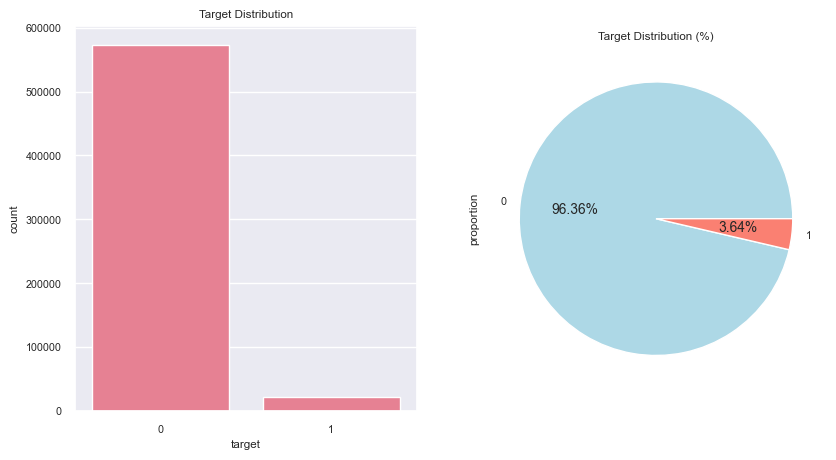

In [11]:
def analyze_target_distribution(df):
    """分析目标变量分布"""
    fig = plt.figure(figsize=(15, 5))
    
    # 计数图
    plt.subplot(131)
    sns.countplot(data=df, x='target')
    plt.title('Target Distribution')
    
    # 饼图
    plt.subplot(132)
    df['target'].value_counts(normalize=True).plot(
        kind='pie', autopct='%.2f%%',
        colors=['lightblue', 'salmon']
    )
    plt.title('Target Distribution (%)')
    
    # 打印具体数值
    print("\nTarget Distribution:")
    print(df['target'].value_counts())
    print("\nTarget Percentage:")
    print(df['target'].value_counts(normalize=True))

# 执行目标变量分析
print("\n目标变量分析:")
analyze_target_distribution(data_df)

# 1.2 缺失值分析


缺失值分析:


<Figure size 1500x600 with 0 Axes>

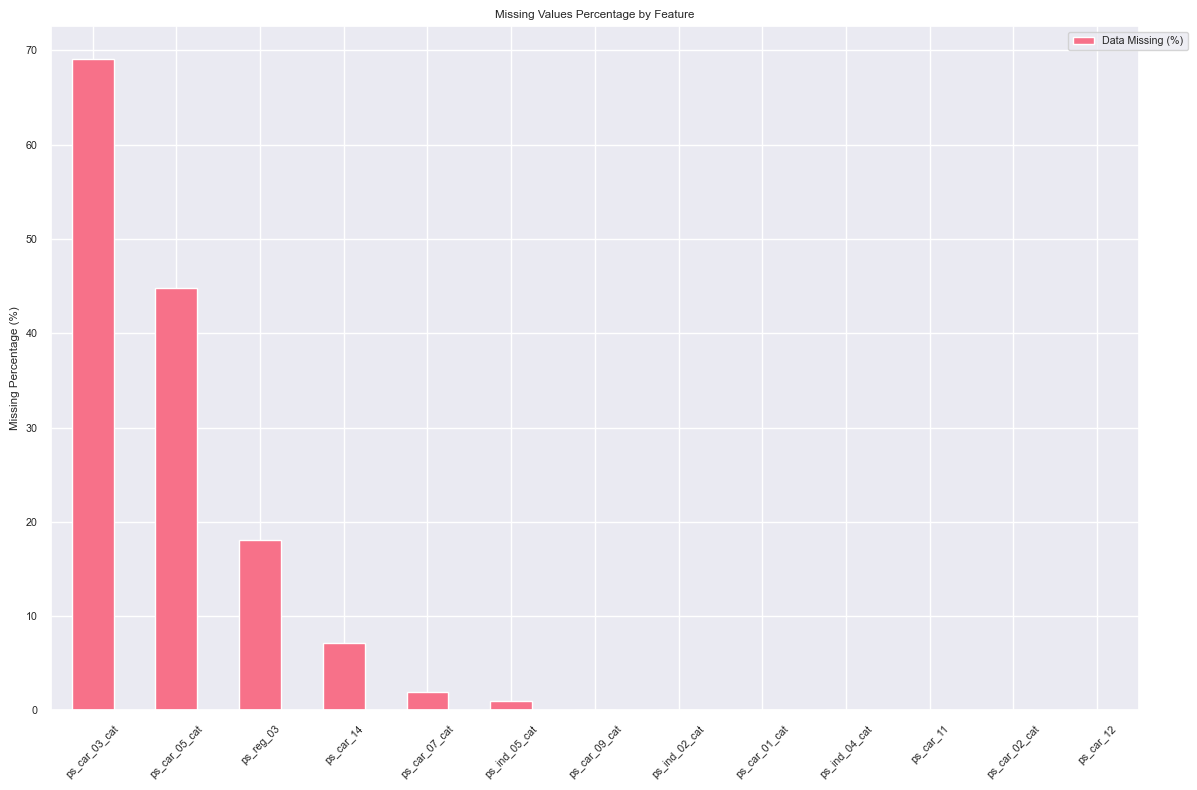


Features with missing values:
               Data Missing (%)
ps_car_03_cat         69.089837
ps_car_05_cat         44.782531
ps_reg_03             18.106490
ps_car_14              7.160474
ps_car_07_cat          1.930237
ps_ind_05_cat          0.975955
ps_car_09_cat          0.095596
ps_ind_02_cat          0.036290
ps_car_01_cat          0.017977
ps_ind_04_cat          0.013945
ps_car_11              0.000840
ps_car_02_cat          0.000840
ps_car_12              0.000168


In [12]:
def analyze_missing_values(data_df):
    """分析缺失值"""
    # 计算缺失值的百分比
    missing_data = (data_df == -1).sum() / len(data_df) * 100  # 百分比

    # 创建缺失值 DataFrame
    missing_df = pd.DataFrame({
        'Data Missing (%)': missing_data,
    }).sort_values('Data Missing (%)', ascending=False)
    
    # 只显示有缺失值的特征
    missing_df = missing_df[
        missing_df['Data Missing (%)'] > 0
    ]
    
    # 绘制缺失值百分比的柱状图
    plt.figure(figsize=(15, 6))
    missing_df.plot(kind='bar')
    plt.title('Missing Values Percentage by Feature')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()
    
    # 打印缺失值百分比
    print("\nFeatures with missing values:")
    print(missing_df)

# 执行缺失值分析
print("\n缺失值分析:")
analyze_missing_values(data_df)

# 1.3 特征相关性分析


特征相关性分析:
Binary Features Correlation


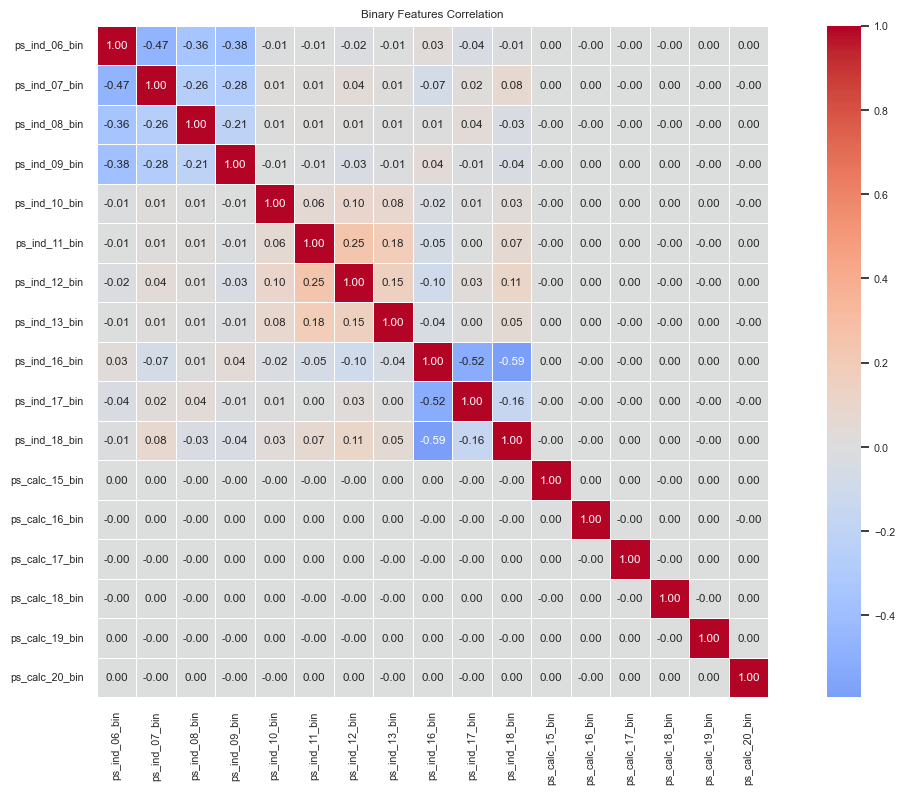


Categorical Features Correlation


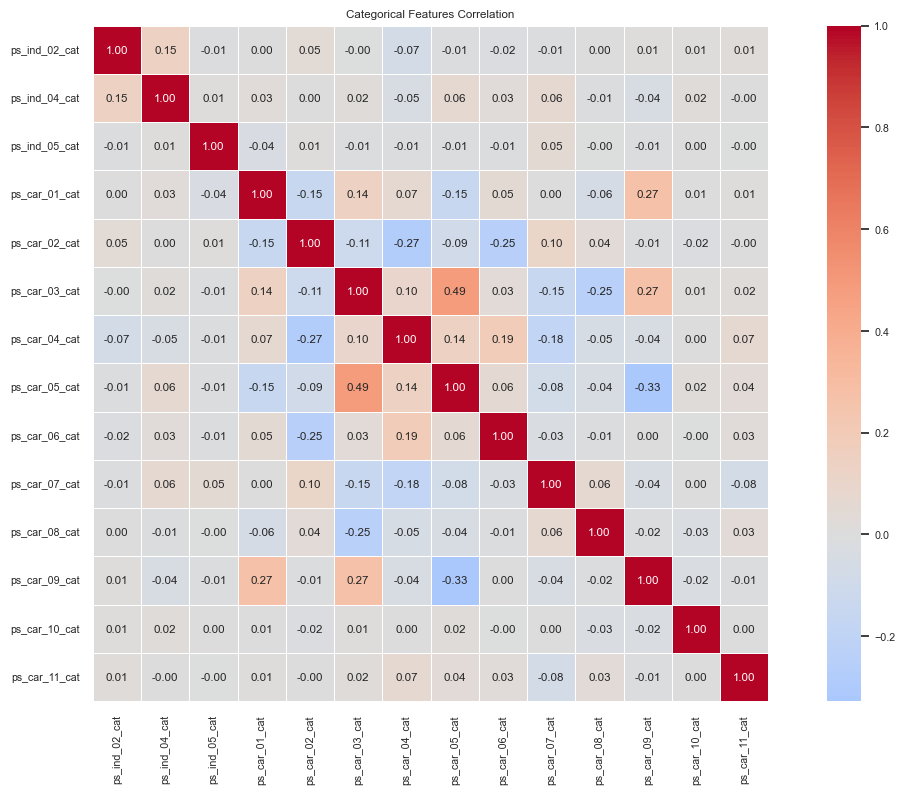

In [13]:
def plot_correlation_matrix(df, features, title, figsize=(12, 8), font_scale=0.7):
    """绘制相关性矩阵"""
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)
    
    corr_matrix = df[features].corr()
    
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=0.5,

    )
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 执行相关性分析
print("\n特征相关性分析:")
print("Binary Features Correlation")
plot_correlation_matrix(data_df, binary_features, "Binary Features Correlation")

print("\nCategorical Features Correlation")
plot_correlation_matrix(data_df, categorical_features, "Categorical Features Correlation")


# 1.4 特征分布分析


特征分布分析:
Binary Features Distribution


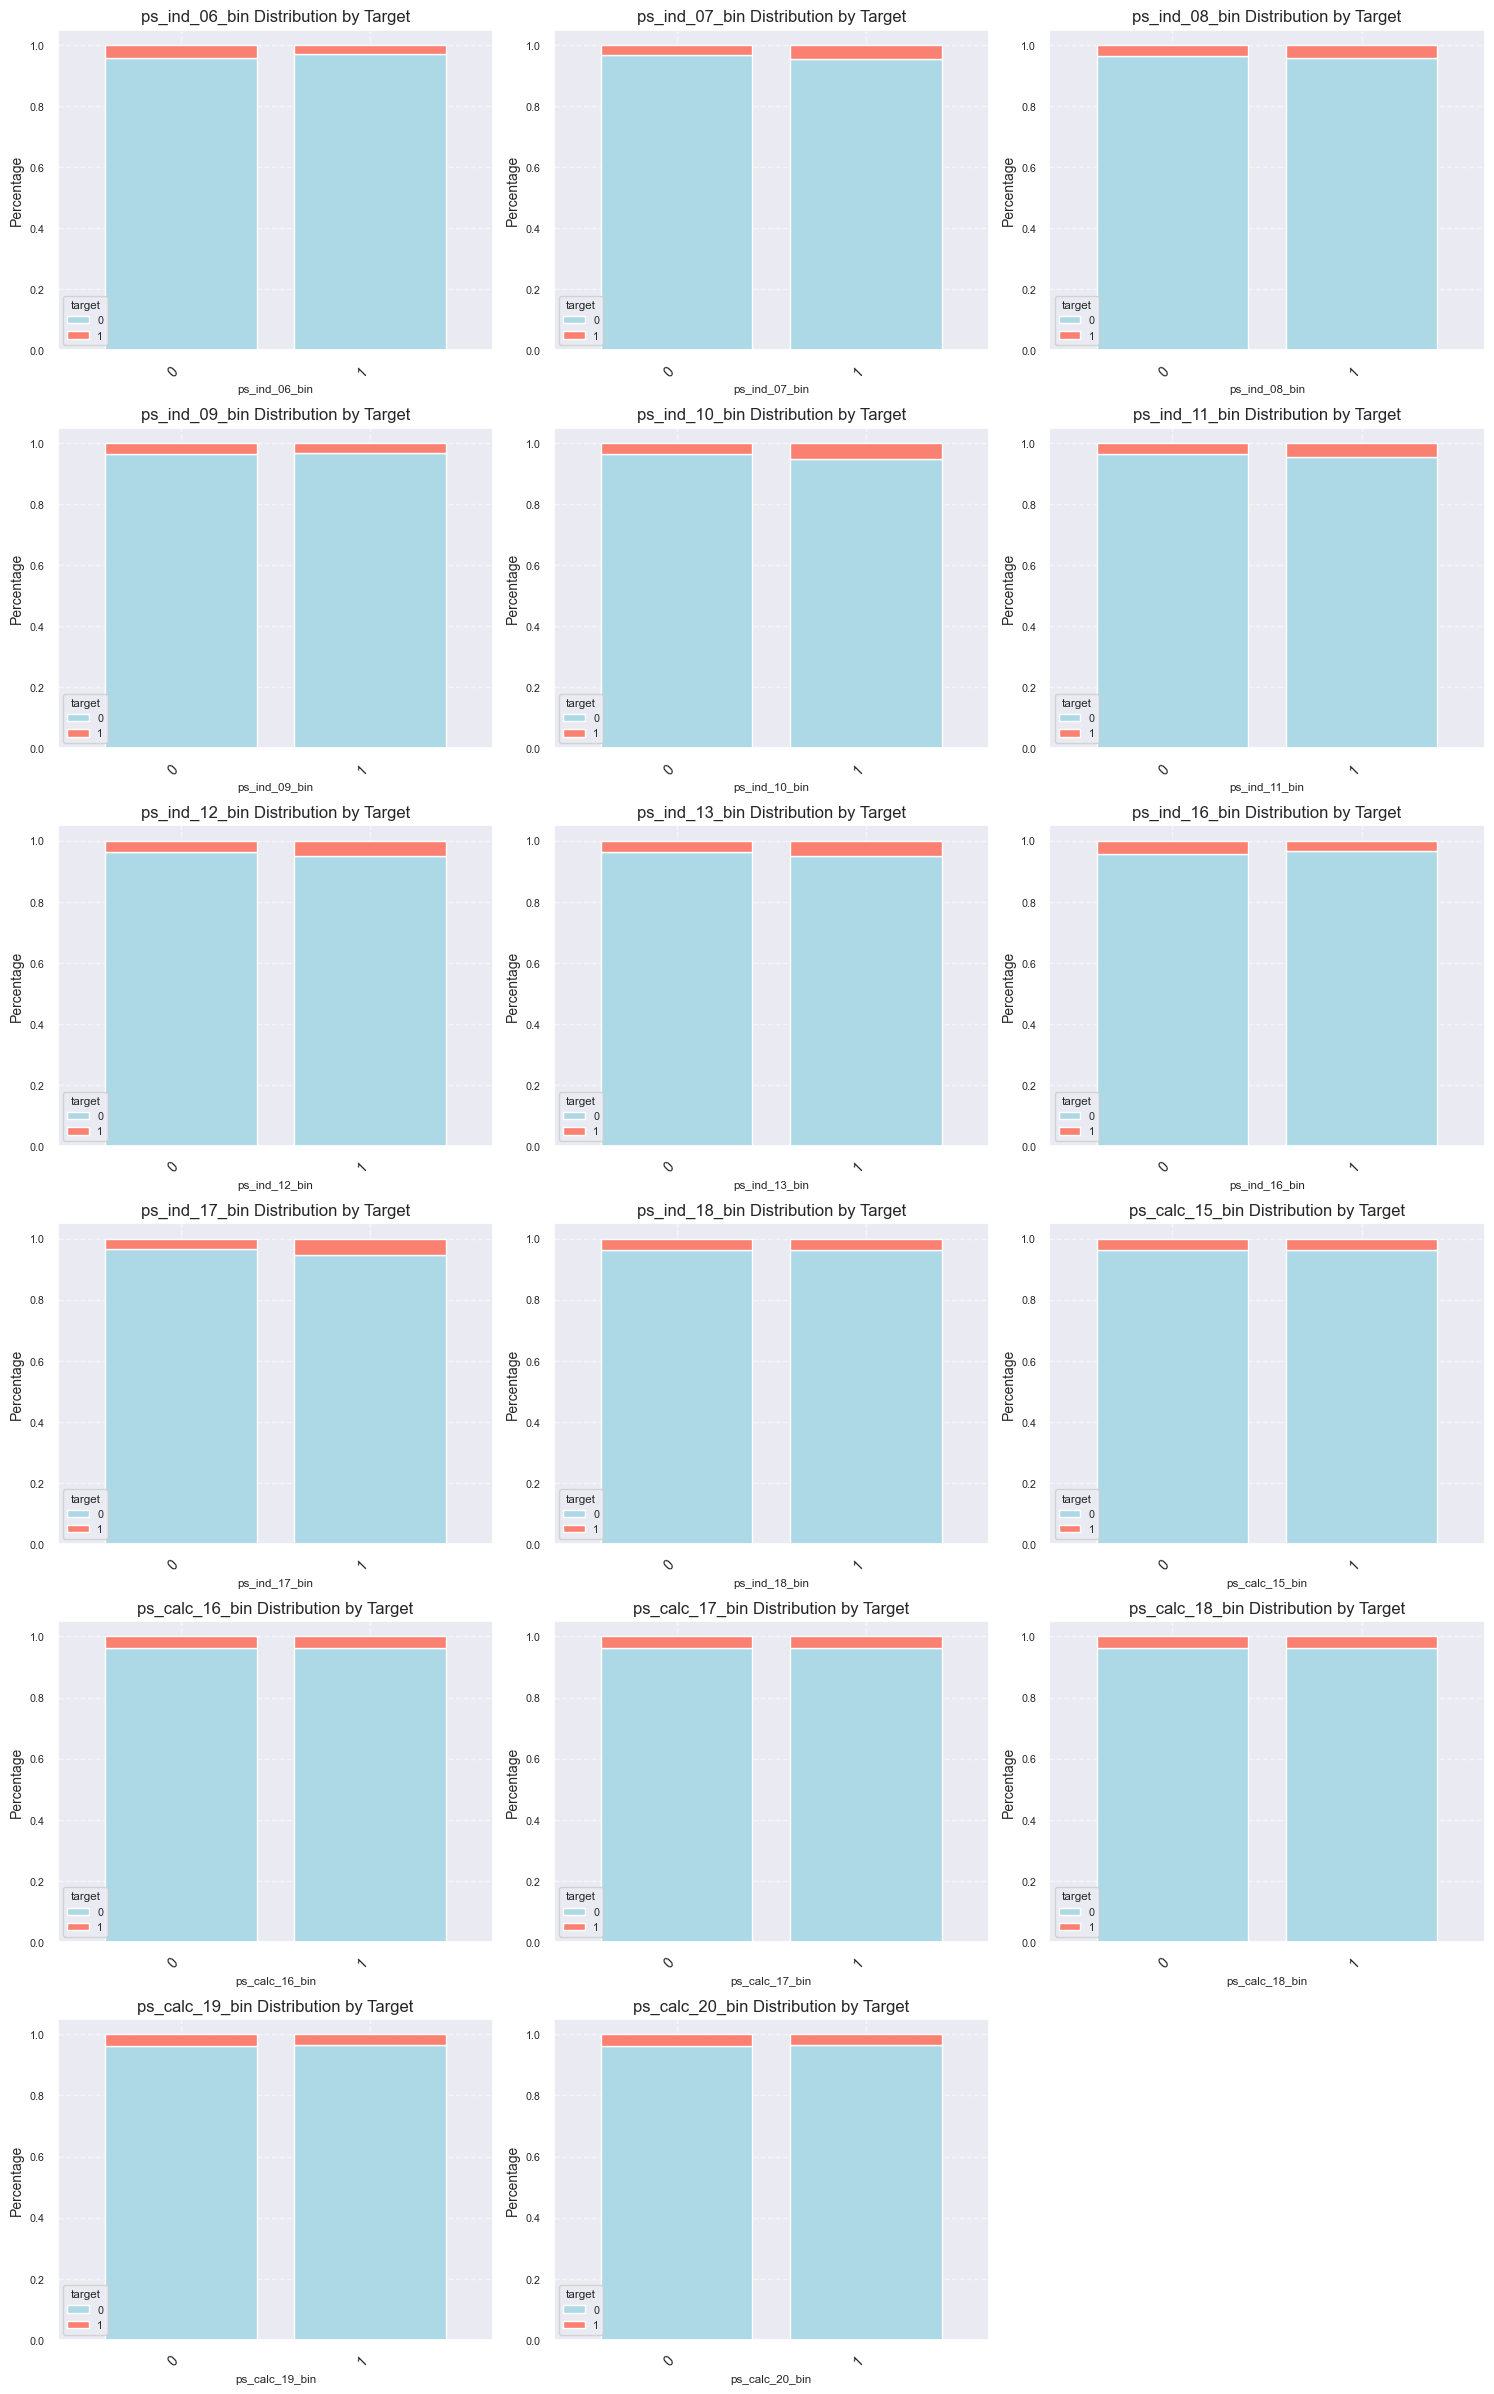


Categorical Features Distribution (excluding ps_car_11_cat)


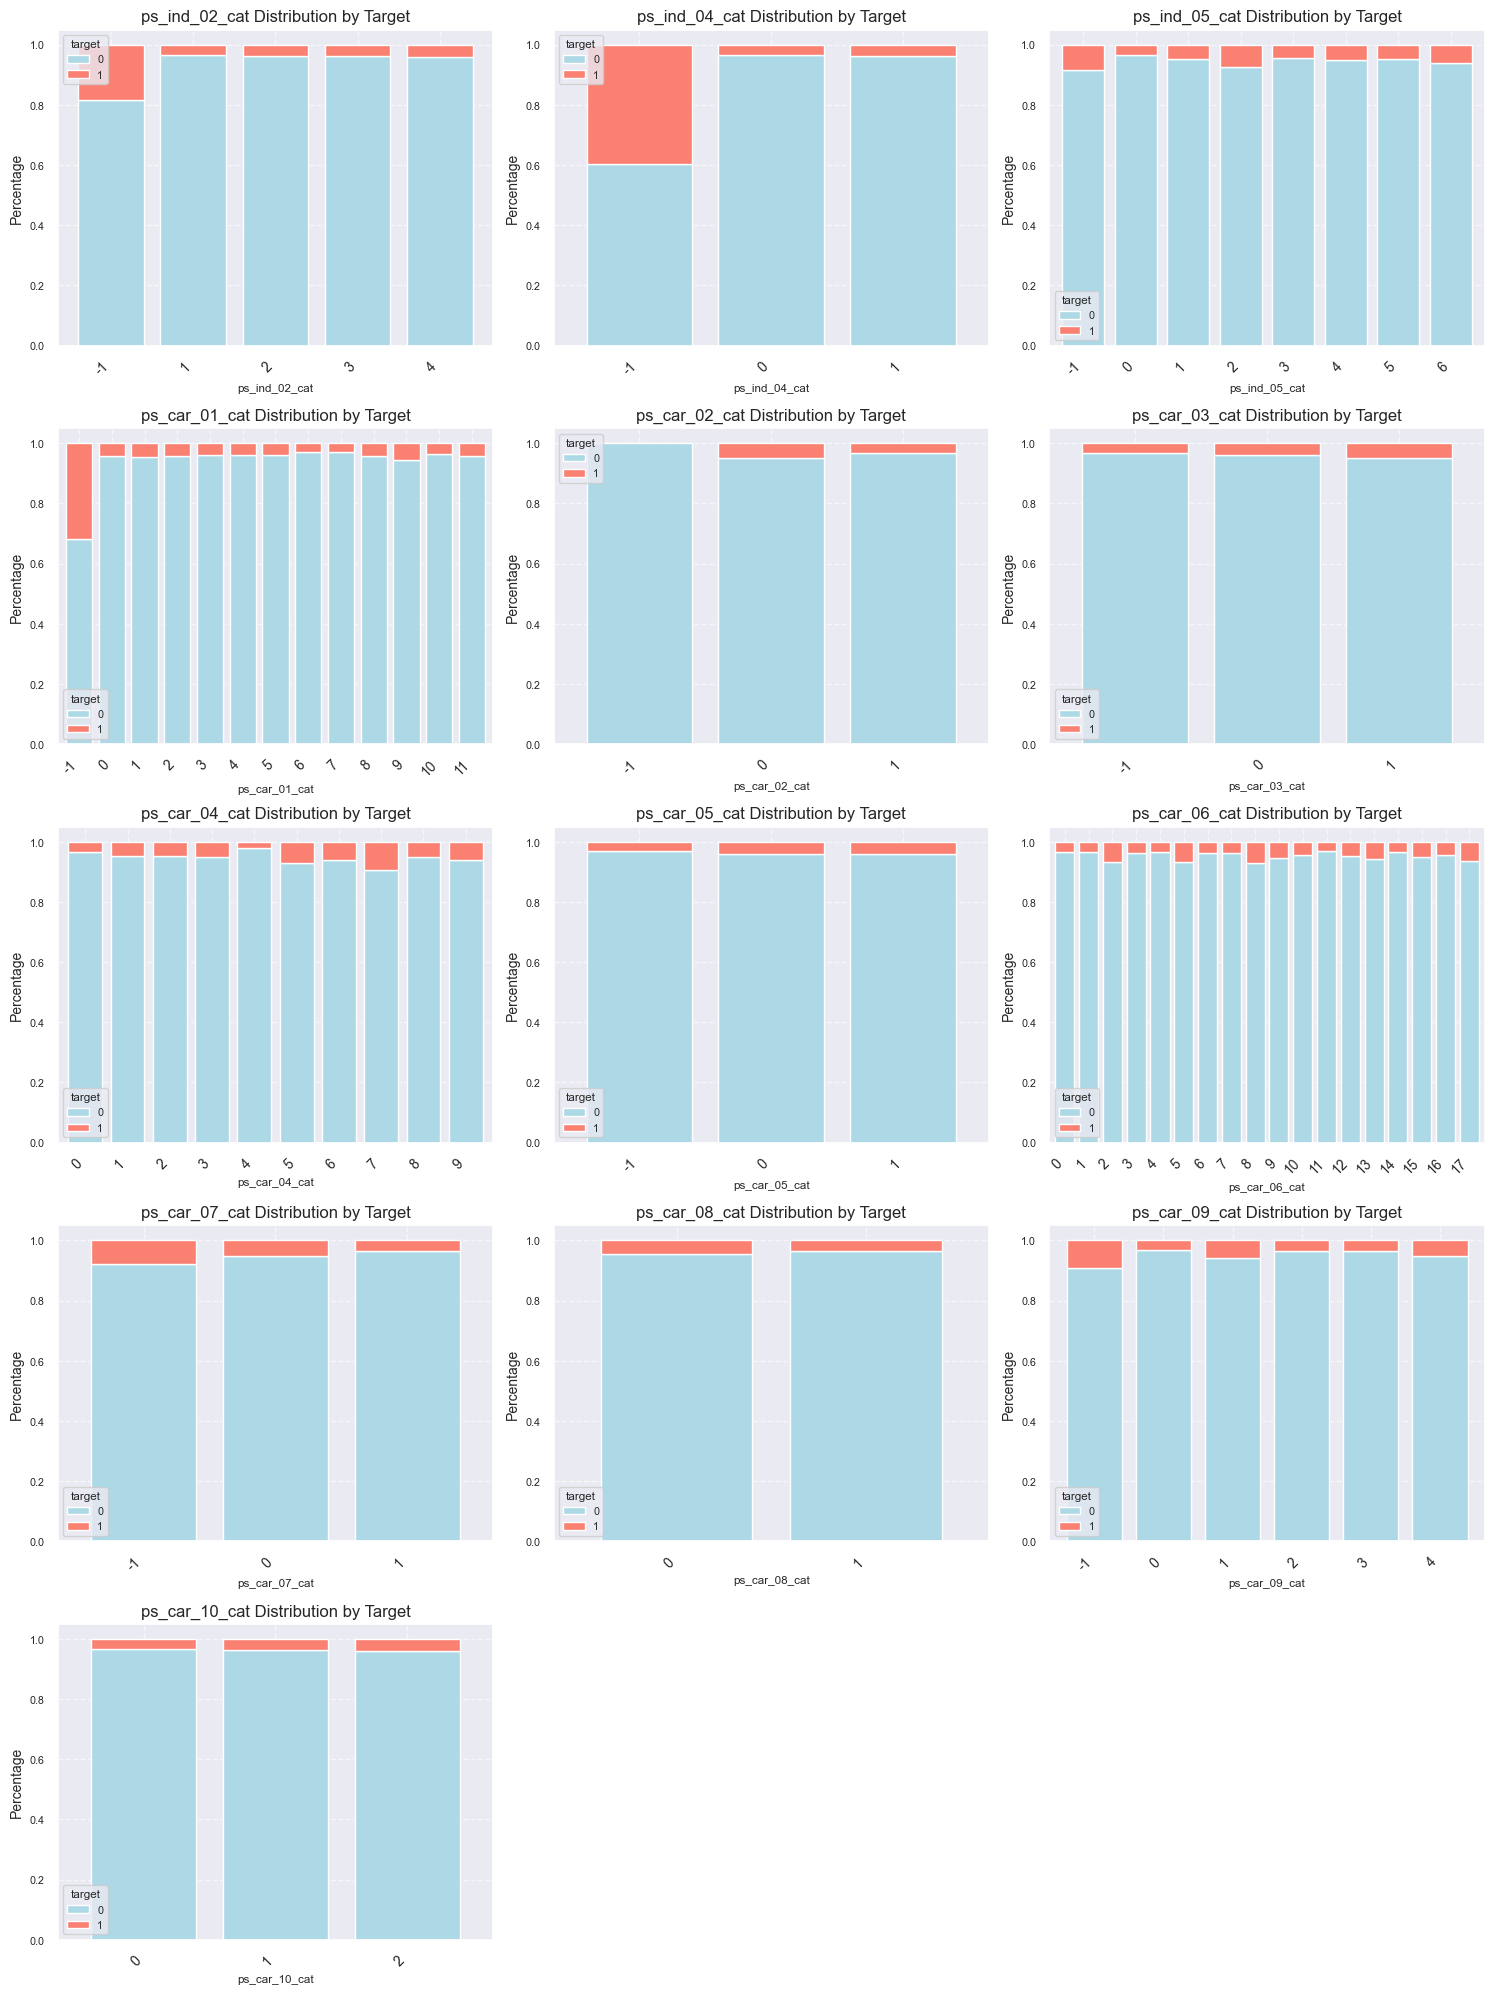


绘制 ps_car_11_cat 特征分布:


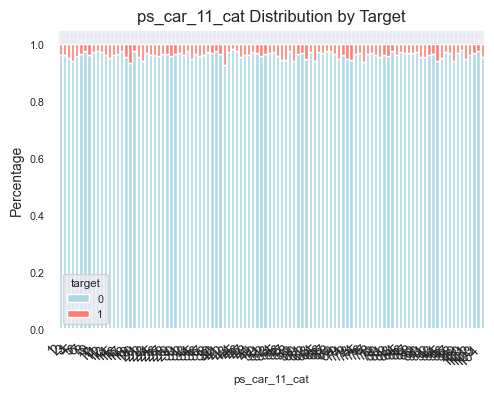

In [14]:
def analyze_feature_distributions(df, features, feature_type, ncols=3, single_feature=None):
    """分析特征分布并优化绘图"""
    
    # 如果指定了single_feature，只绘制该特征
    if single_feature is not None:
        features = [single_feature]
        ncols = 1  # 单独显示时，调整为一列
    
    nrows = (len(features) - 1) // ncols + 1
    
    # 调整图表大小
    if single_feature == 'ps_car_11_cat':
        fig = plt.figure(figsize=(15, 6))  # 调整为更合理的宽度
    else:
        fig = plt.figure(figsize=(ncols * 5, nrows * 4))
    
    for i, feature in enumerate(features, 1):
        if feature == single_feature:  # 对单独特征做特殊处理
            # 使用ax单独绘制特定特征
            ax = fig.add_subplot(111)  # 直接使用一个子图
            df_temp = pd.crosstab(
                df[feature], 
                df['target'], 
                normalize='index'
            )
            df_temp.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'], width=0.8)
            ax.set_title(f'{feature} Distribution by Target', fontsize=14)
            ax.set_ylabel('Percentage', fontsize=12)
            ax.set_xticks(range(len(df_temp.index)))
            ax.set_xticklabels(df_temp.index, rotation=45, ha='right', fontsize=10)
        else:
            plt.subplot(nrows, ncols, i)  # 对其他特征使用常规处理
            if feature_type in ['binary', 'categorical']:
                # 堆叠条形图
                df_temp = pd.crosstab(
                    df[feature], 
                    df['target'], 
                    normalize='index'
                )
                df_temp.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightblue', 'salmon'], width=0.8)
                plt.title(f'{feature} Distribution by Target', fontsize=12)
                plt.ylabel('Percentage', fontsize=10)
                plt.xticks(rotation=45, ha='right', fontsize=10)

        # 增加网格线来提升可读性
        plt.grid(True, linestyle='--', alpha=0.6)

    # 调整子图间距，避免标签重叠
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # 显示绘制的图
    plt.tight_layout()
    plt.show()


# 执行特征分布分析
print("\n特征分布分析:")
print("Binary Features Distribution")
analyze_feature_distributions(data_df, binary_features, 'binary')

print("\nCategorical Features Distribution (excluding ps_car_11_cat)")
analyze_feature_distributions(data_df, [feature for feature in categorical_features if feature != 'ps_car_11_cat'], 'categorical')

print("\n绘制 ps_car_11_cat 特征分布:")
analyze_feature_distributions(data_df, ['ps_car_11_cat'], 'categorical', ncols=1)




箱线图分析:
Continuous Features Boxplots


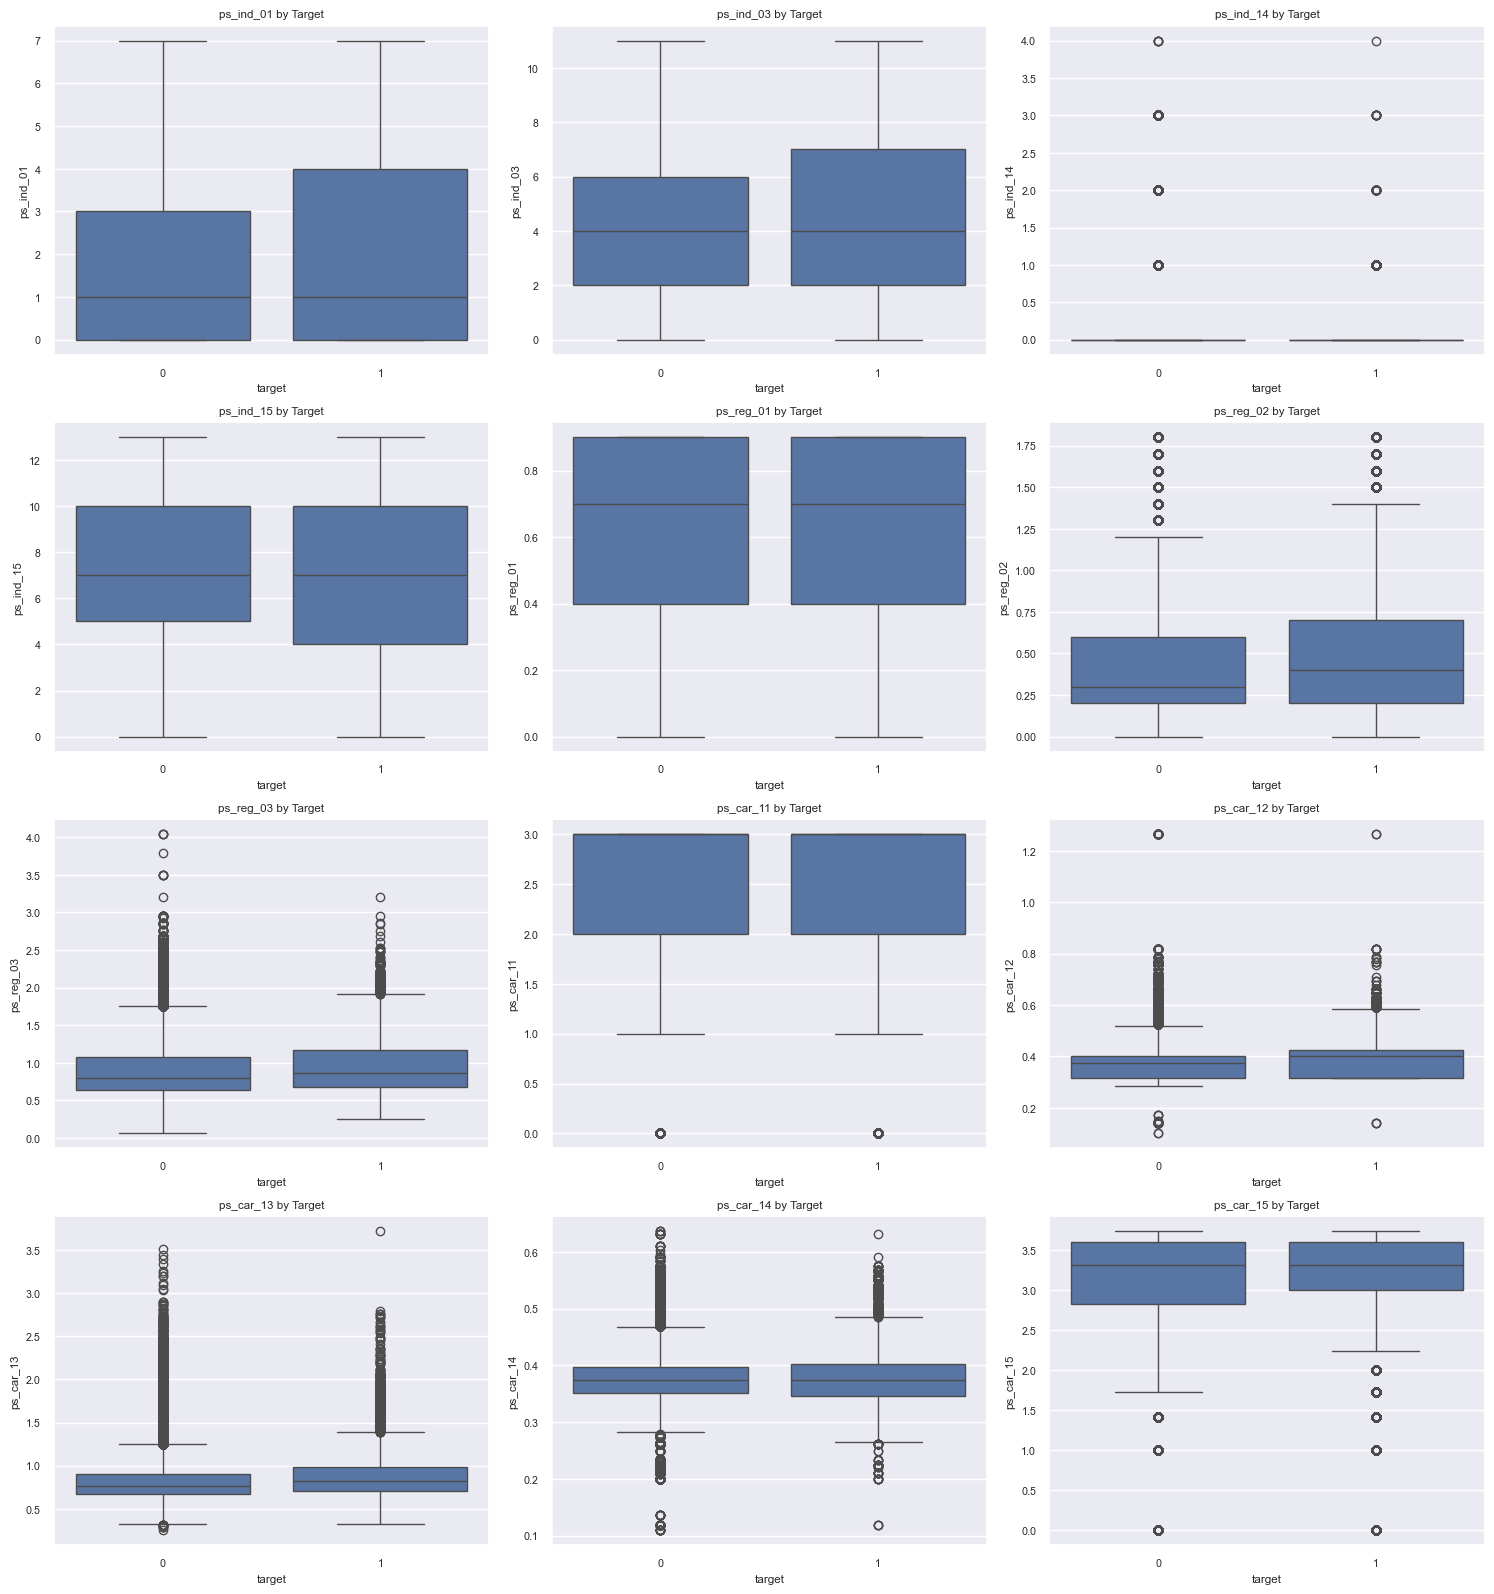

In [15]:
def plot_boxplots(df, features, ncols=3):
    """绘制箱线图"""
    nrows = (len(features) - 1) // ncols + 1
    plt.figure(figsize=(ncols * 5, nrows * 4))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(data=df[df[feature] != -1], x='target', y=feature)
        plt.title(f'{feature} by Target')
        plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

# 执行箱线图分析
print("\n箱线图分析:")
print("Continuous Features Boxplots")
plot_boxplots(data_df, continuous_features)



连续特征分布分析:


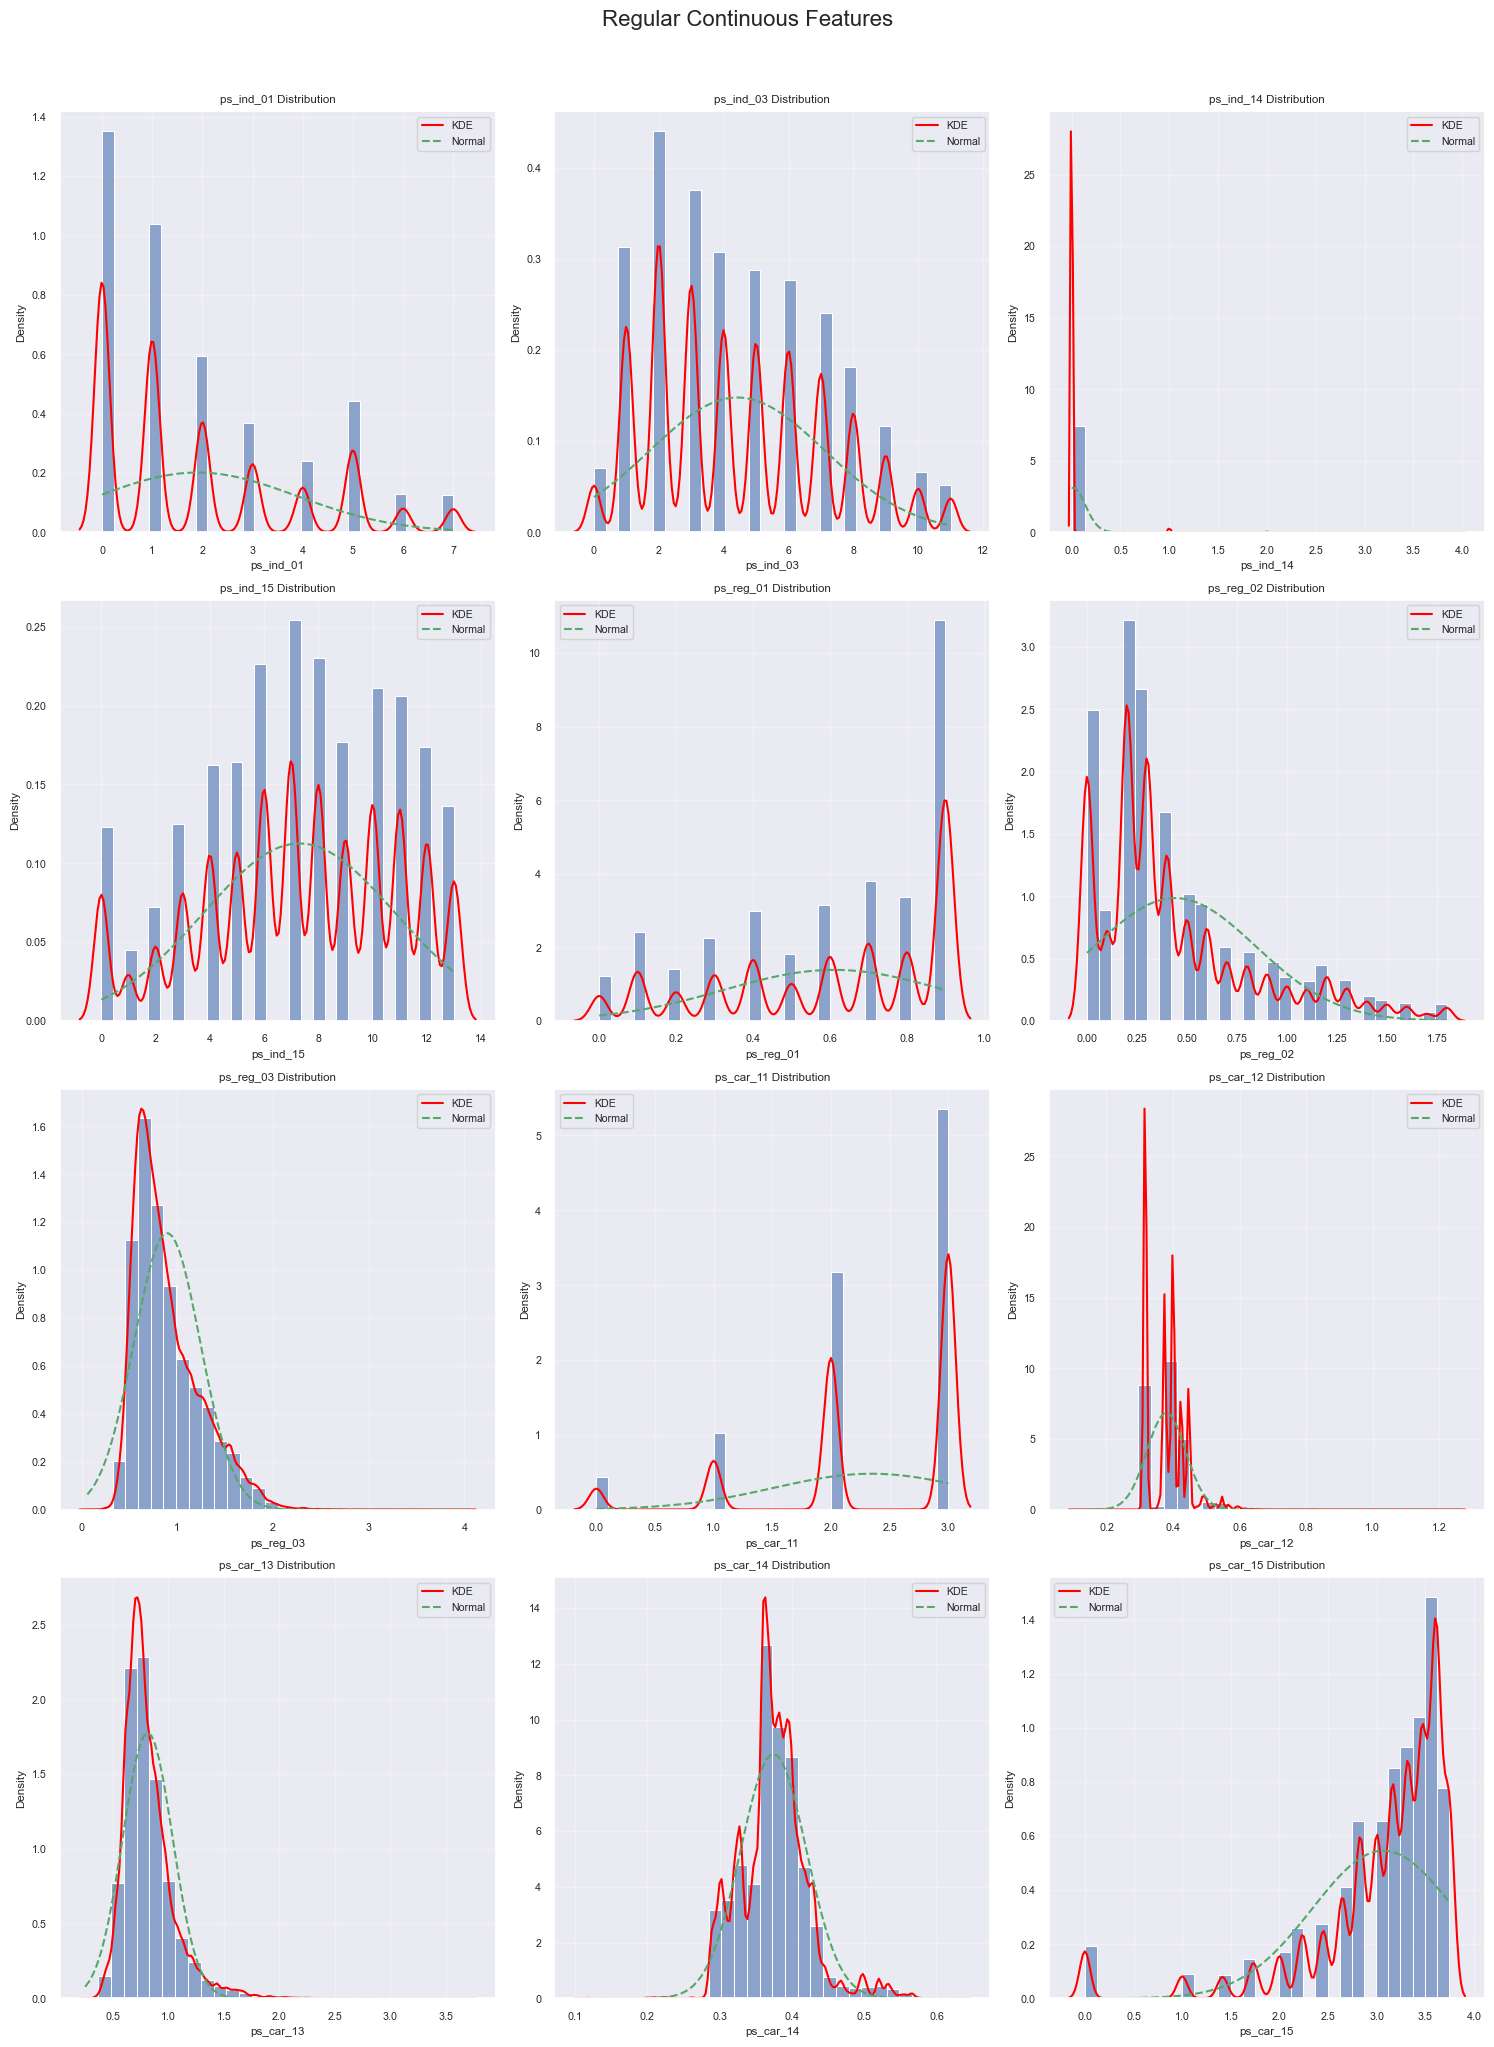


Regular Continuous Features - 基本统计信息:
           ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  416648.000000  416648.000000  416648.000000  416648.000000   
mean        1.900295       4.421207       0.012536       7.300729   
std         1.984169       2.698962       0.127692       3.544443   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_reg_01      ps_reg_02      ps_reg_03      ps_car_11  \
count  416648.000000  416648.000000  416648.000000  416648.000000   
mean        0.610869       0.440043       0.551437       2.345704   
std         0.287741       0.405029       0.793833       0.833225   
min         0.000000       0.000000      -1.000000      -1.0000

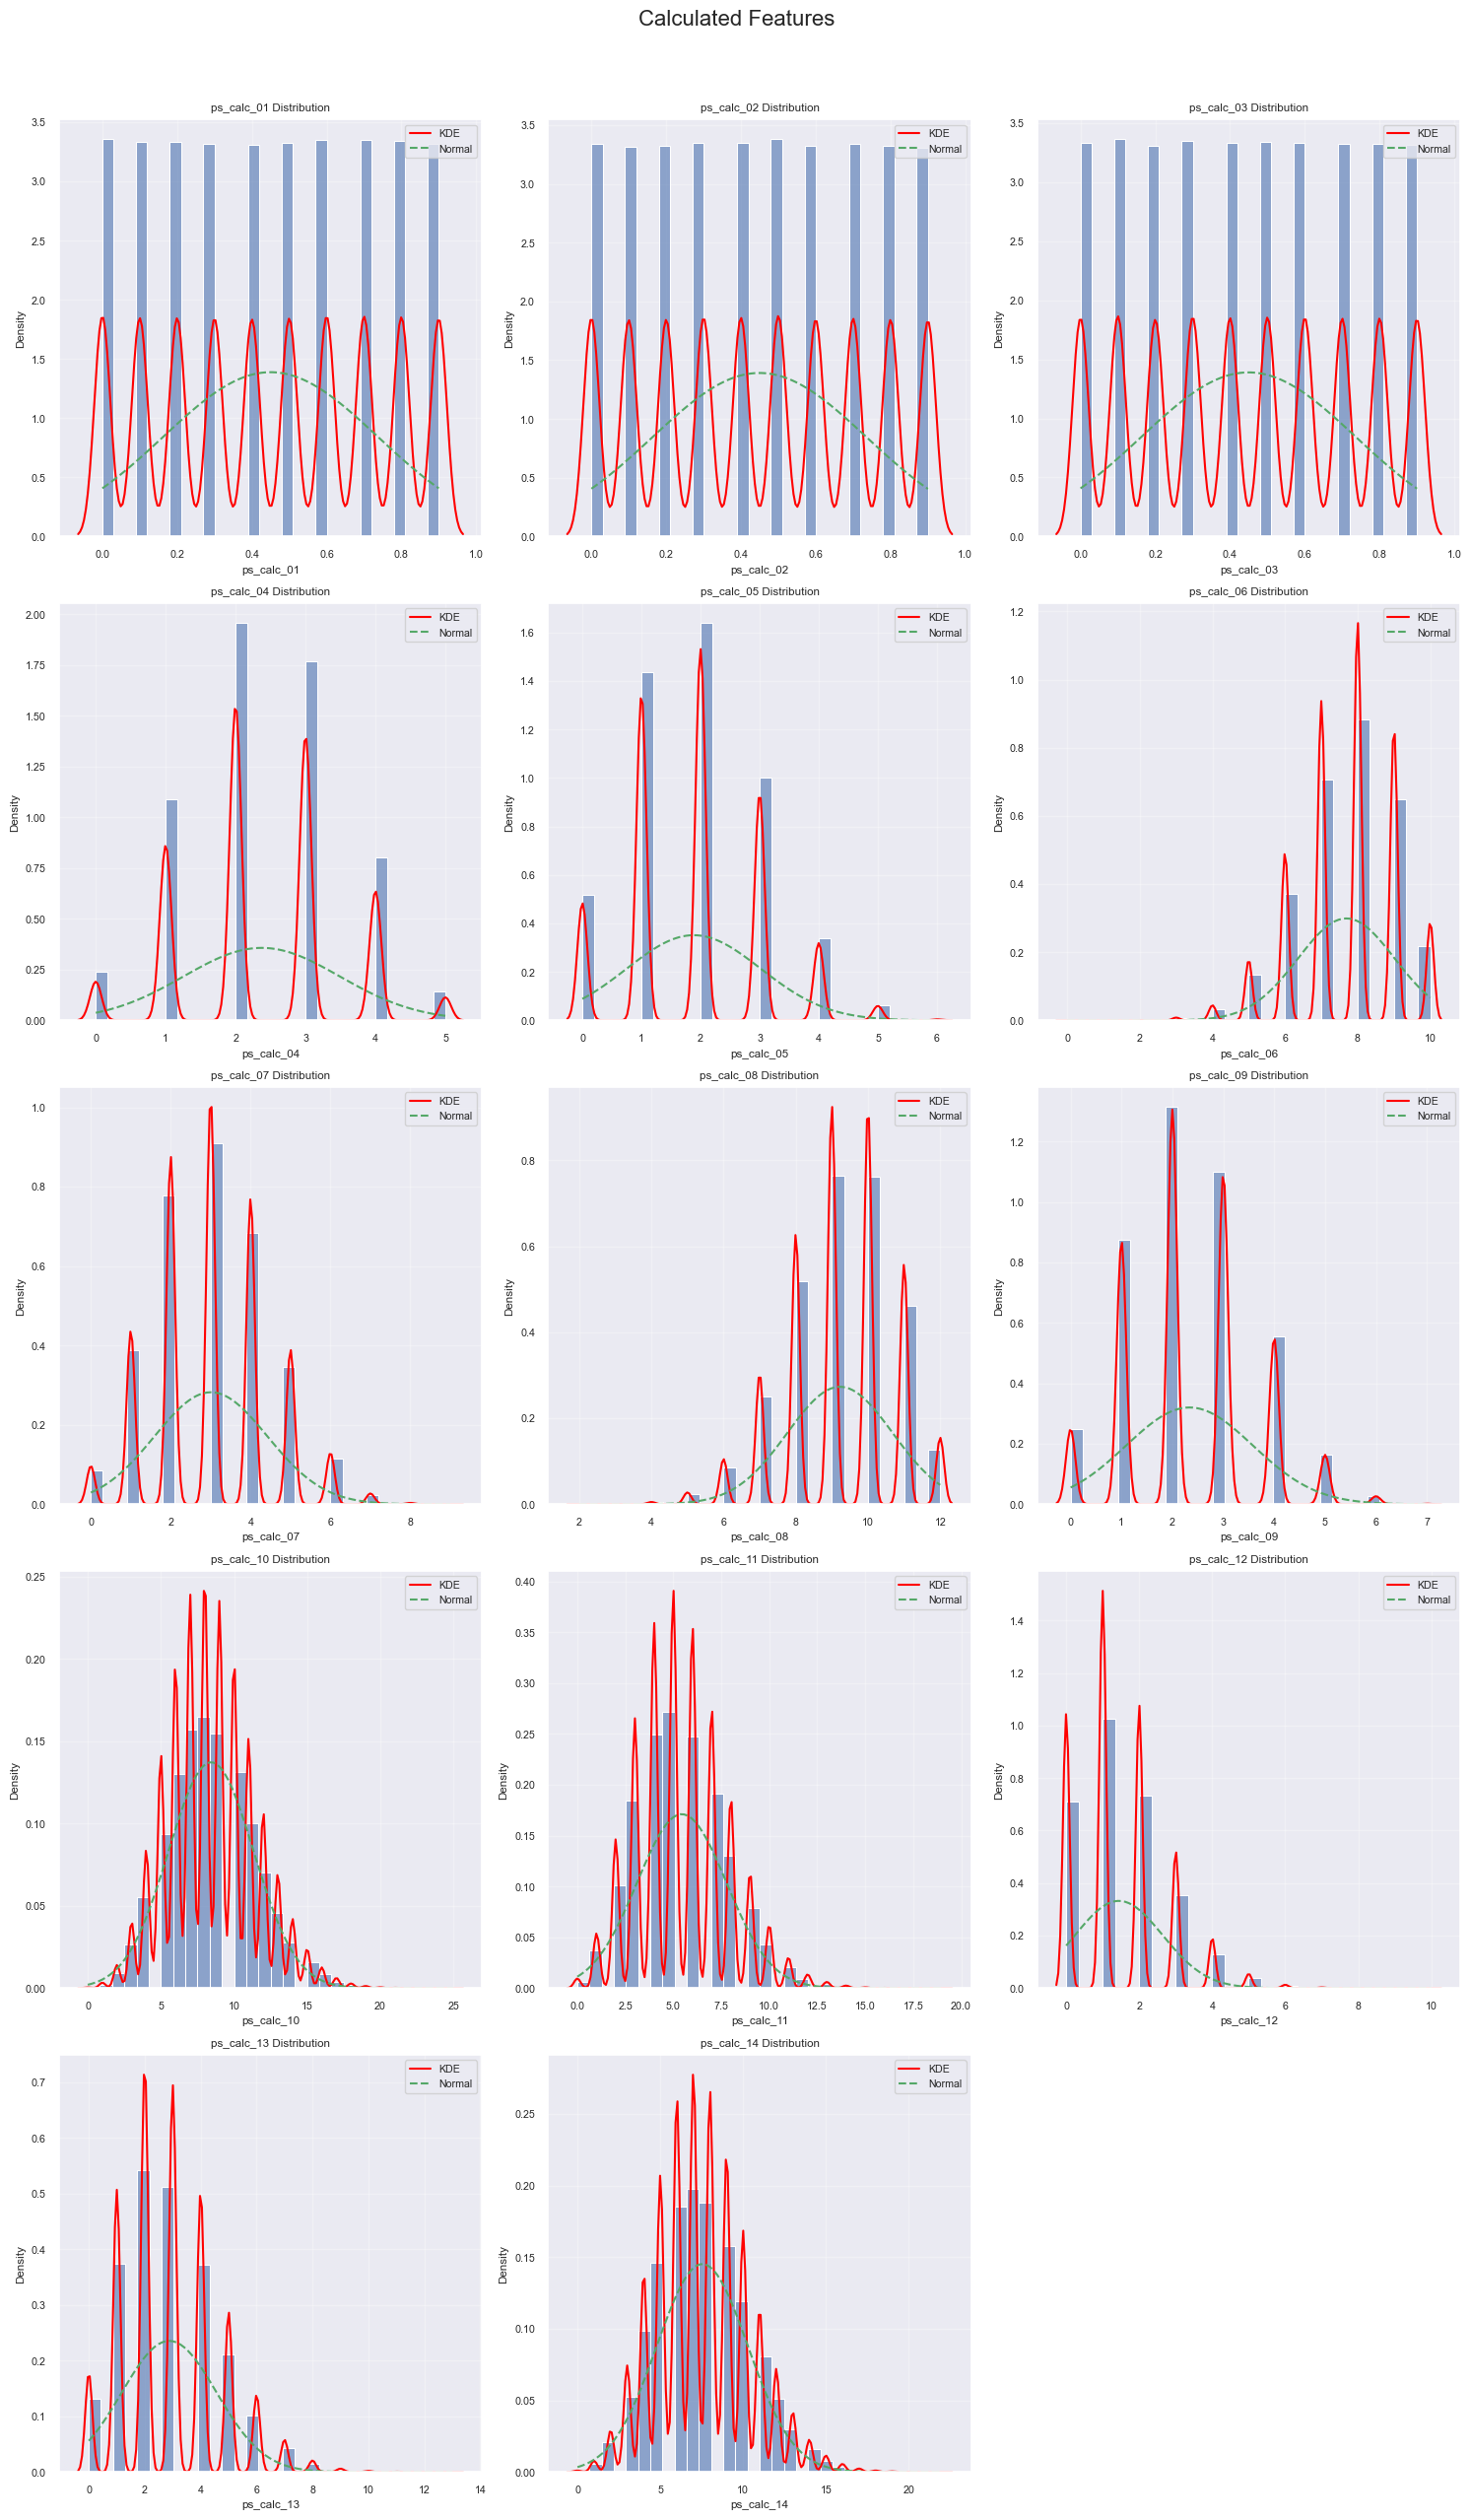


Calculated Features - 基本统计信息:
          ps_calc_01     ps_calc_02     ps_calc_03     ps_calc_04  \
count  416648.000000  416648.000000  416648.000000  416648.000000   
mean        0.449953       0.449581       0.449500       2.372537   
std         0.287374       0.286763       0.287086       1.117192   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.200000       0.200000       0.200000       2.000000   
50%         0.500000       0.400000       0.400000       2.000000   
75%         0.700000       0.700000       0.700000       3.000000   
max         0.900000       0.900000       0.900000       5.000000   

          ps_calc_05     ps_calc_06     ps_calc_07     ps_calc_08  \
count  416648.000000  416648.000000  416648.000000  416648.000000   
mean        1.884072       7.688212       3.006343       9.224588   
std         1.135449       1.333349       1.414161       1.460264   
min         0.000000       0.000000       0.000000       2.000000   
25

In [17]:
def analyze_continuous_features(df, continuous_features, calc_features):
    """分析连续特征的分布"""
    # 将连续特征分为calc和其他
    other_continuous = [f for f in continuous_features if f not in calc_features]
    
    # 分别分析两类特征
    for feature_set, title in [(other_continuous, "Regular Continuous Features"), 
                             (calc_features, "Calculated Features")]:
        nrows = (len(feature_set) - 1) // 3 + 1
        fig = plt.figure(figsize=(15, 5*nrows))
        
        for i, feature in enumerate(feature_set, 1):
            plt.subplot(nrows, 3, i)
            
            # 绘制直方图和正态分布曲线
            sns.histplot(data=df[df[feature] != -1], x=feature, bins=30, stat='density', alpha=0.6)
            
            # 添加核密度估计曲线
            sns.kdeplot(data=df[df[feature] != -1], x=feature, color='red', label='KDE')
            
            # 添加正态分布拟合曲线
            data = df[df[feature] != -1][feature]
            mu = data.mean()
            sigma = data.std()
            x = np.linspace(data.min(), data.max(), 100)
            p = stats.norm.pdf(x, mu, sigma)
            plt.plot(x, p, 'g--', label='Normal')
            
            plt.title(f'{feature} Distribution')
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        plt.suptitle(title, y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # 打印基本统计息
        print(f"\n{title} - 基本统计信息:")
        print(df[feature_set].describe())

# 在执行箱线图分析之后，数据预处理之前调用此函数
print("\n连续特征分布分析:")
analyze_continuous_features(train_df, continuous_features, calc_features)


# 1.5 总结统计信息

In [18]:
def print_summary_stats():
    """打印总结统计信息"""
    print("\n总结统计信息:")
    
    # 目标变量分布
    target_dist = data_df['target'].value_counts(normalize=True)
    print(f"\n类别不平衡比例: {target_dist[0]:.2%} vs {target_dist[1]:.2%}")
    
    # 缺失值情况
    missing_count = (data_df == -1).sum().sum()
    print(f"总缺失值数量: {missing_count}")
    print(f"缺值比例: {missing_count/(data_df.shape[0]*data_df.shape[1]):.2%}")
    
    # 特征重要性初步评估（基于与目标变量的相关性）
    correlations = []
    for col in data_df.columns:
        if col not in ['id', 'target']:
            corr = np.corrcoef(data_df[col], data_df['target'])[0,1]
            correlations.append((col, abs(corr)))
    
    correlations.sort(key=lambda x: x[1], reverse=True)
    print("\n与目标变量相关性最高的特征:")
    for feature, corr in correlations[:10]:
        print(f"{feature}: {corr:.4f}")

# 执行总结统计
print_summary_stats()



总结统计信息:

类别不平衡比例: 96.36% vs 3.64%
总缺失值数量: 846458
缺值比例: 2.41%

与目标变量相关性最高的特征:
ps_car_13: 0.0539
ps_car_12: 0.0388
ps_ind_17_bin: 0.0371
ps_car_07_cat: 0.0364
ps_reg_02: 0.0348
ps_ind_07_bin: 0.0342
ps_ind_06_bin: 0.0340
ps_car_04_cat: 0.0329
ps_car_03_cat: 0.0324
ps_car_02_cat: 0.0315


# 2.1 划分数据集

In [69]:
# 在加载数据后，预处理之前添加数据集划分
print("\n划分训练集和测试集...")
train_df, test_df = train_test_split(data_df, test_size=0.3, random_state=42, stratify=data_df['target'])
print(f"训练集大小: {train_df.shape}")
print(f"测试集大小: {test_df.shape}")


划分训练集和测试集...
训练集大小: (416648, 59)
测试集大小: (178564, 59)


# 2.2 数据处理和缺失值填充

In [68]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def preprocess_data(train_df, test_df):
    """数据预处理"""
    print("\n数据预处理:")
    
    # 分离特征和目标变量
    features = [col for col in train_df.columns if col not in ['id', 'target']]
    X_train = train_df[features].copy()
    y_train = train_df['target'].copy()
    X_test = test_df[features].copy()
    y_test = test_df['target'].copy()
    
    # 分别处理不同类型的特征
    binary_features = [col for col in features if '_bin' in col]
    categorical_features = [col for col in features if '_cat' in col]
    calc_features = [col for col in features if '_calc' in col and '_bin' not in col]
    continuous_features = [col for col in features if col not in binary_features + categorical_features + calc_features]
    
    # 1. 处理分类特征
    for col in categorical_features:
        if col == 'ps_ind_02_cat':
            # 用均值填充
            mean_val = X_train[col].value_counts().idxmax()
            X_train[col] = X_train[col].replace(-1, mean_val)
            X_test[col] = X_test[col].replace(-1, mean_val)
        elif col == 'ps_ind_04_cat':
            # 用均值填充
            mean_val = X_train[col].value_counts().idxmax()
            X_train[col] = X_train[col].replace(-1, mean_val)
            X_test[col] = X_test[col].replace(-1, mean_val)
        elif col == 'ps_ind_05_cat':
            # 用众数填充
            mode_val = X_train[col].mode()[0]
            X_train[col] = X_train[col].replace(-1, mode_val)
            X_test[col] = X_test[col].replace(-1, mode_val)
        elif col == 'ps_car_01_cat':
            # 用均值填充
            mean_val = X_train[col].value_counts().idxmax()
            X_train[col] = X_train[col].replace(-1, mean_val)
            X_test[col] = X_test[col].replace(-1, mean_val)
        elif col == 'ps_car_02_cat':
            # 用均值填充
            mean_val = X_train[col].value_counts().idxmax()
            X_train[col] = X_train[col].replace(-1, mean_val)
            X_test[col] = X_test[col].replace(-1, mean_val)
        elif col == 'ps_car_03_cat' or col == 'ps_car_05_cat':
            # 视为一个新的类别
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')

        elif col == 'ps_car_07_cat':
            # 用众数填充
            mode_val = X_train[col].mode()[0]
            X_train[col] = X_train[col].replace(-1, mode_val)
            X_test[col] = X_test[col].replace(-1, mode_val)
        elif col == 'ps_car_09_cat':
            # 用均值填充
            mean_val = X_train[col].value_counts().idxmax()
            X_train[col] = X_train[col].replace(-1, mean_val)
            X_test[col] = X_test[col].replace(-1, mean_val)
    
    # 2. 删除特定的calc特征（ps_calc_01, ps_calc_02, ps_calc_03）
    calc_to_remove = ['ps_calc_01', 'ps_calc_02', 'ps_calc_03']
    X_train.drop(columns=[col for col in calc_to_remove if col in X_train.columns], inplace=True)
    X_test.drop(columns=[col for col in calc_to_remove if col in X_test.columns], inplace=True)
    
    # 3. 处理其他连续特征
    scaler = StandardScaler()
    for col in continuous_features:
        # 用中位数填充缺失值并进行标准化
        median_val = X_train[col][X_train[col] != -1].median()
        X_train[col] = X_train[col].replace(-1, median_val)
        X_test[col] = X_test[col].replace(-1, median_val)
        
        # 标准化
        X_train[[col]] = scaler.fit_transform(X_train[[col]])
        X_test[[col]] = scaler.transform(X_test[[col]])
    
    print("处理后的数据形状:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test

# 执行预处理
X_train, X_test, y_train, y_test = preprocess_data(train_df, test_df)


数据预处理:
处理后的数据形状:
X_train shape: (416648, 54)
X_test shape: (178564, 54)


# 2.3 使用GAN来处理不平衡问题

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, output_dim),
            nn.Tanh()
        )
    
    def forward(self, z):
        """定义前向传播过程"""
        return self.model(z)


class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        """定义前向传播过程"""
        return self.model(x)


class InsuranceGAN:
   def __init__(self, input_dim, latent_dim=100):
       self.input_dim = input_dim
       self.latent_dim = latent_dim
       self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
       
       self.generator = Generator(latent_dim, input_dim).to(self.device)
       self.discriminator = Discriminator(input_dim).to(self.device)
       
       # 调整学习率
       self.g_optimizer = optim.Adam(
           self.generator.parameters(), 
           lr=0.001,
           betas=(0.5, 0.999)
       )
       self.d_optimizer = optim.Adam(
           self.discriminator.parameters(),
           lr=0.00001,
           betas=(0.5, 0.999)
       )
       
       self.G_losses = []
       self.D_losses = []
       
       if not os.path.exists('gan_results'):
           os.makedirs('gan_results')
   
   def train_discriminator(self, real_data, batch_size):
       # 生成假样本
       noise = torch.randn(batch_size, self.latent_dim).to(self.device)
       fake_data = self.generator(noise)
       
       # 标签平滑
       real_labels = (torch.ones(batch_size, 1) * 0.9).to(self.device)
       fake_labels = (torch.zeros(batch_size, 1) * 0.1).to(self.device)
       
       # 真实样本的损失
       real_pred = self.discriminator(real_data)
       d_real_loss = nn.BCELoss()(real_pred, real_labels)
       
       # 生成样本的损失
       fake_pred = self.discriminator(fake_data.detach())
       d_fake_loss = nn.BCELoss()(fake_pred, fake_labels)
       
       # 总损失
       d_loss = d_real_loss + d_fake_loss
       
       return d_loss

   def train_generator(self, batch_size):
       # 生成假样本
       noise = torch.randn(batch_size, self.latent_dim).to(self.device)
       fake_data = self.generator(noise)
       
       # 判别器预测
       validity = self.discriminator(fake_data)
       
       # 生成器损失
       g_loss = nn.BCELoss()(validity, torch.ones(batch_size, 1).to(self.device))
       
       return g_loss

   def train(self, X, epochs=150, batch_size=32):
       scaler = StandardScaler()
       X_scaled = scaler.fit_transform(X)
       self.scaler = scaler
       
       dataset = torch.FloatTensor(X_scaled)
       dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
       
       print("开始训练GAN...")
       for epoch in range(epochs):
           g_losses = []
           d_losses = []
           
           for batch_idx, batch_data in enumerate(dataloader):
               batch_size = batch_data.size(0)
               real_data = batch_data.to(self.device)
               
               # 训练判别器(每5次训练生成器才训练1次判别器)
               if batch_idx % 5 == 0:
                   self.d_optimizer.zero_grad()
                   d_loss = self.train_discriminator(real_data, batch_size)
                   d_loss.backward()
                   self.d_optimizer.step()
                   d_losses.append(d_loss.item())
               
               # 训练生成器3次
               for _ in range(3):
                   self.g_optimizer.zero_grad()
                   g_loss = self.train_generator(batch_size)
                   g_loss.backward()
                   self.g_optimizer.step()
                   g_losses.append(g_loss.item())
           
           self.G_losses.append(np.mean(g_losses))
           if d_losses:  # 只在有d_loss时记录
               self.D_losses.append(np.mean(d_losses))
           
           if (epoch + 1) % 10 == 0:
               print(f'Epoch [{epoch+1}/{epochs}]')
               print(f'D_loss: {np.mean(d_losses):.4f}, G_loss: {np.mean(g_losses):.4f}')
       
       self._plot_training_curves()
   
   def _plot_training_curves(self):
       plt.figure(figsize=(10, 5))
       plt.plot(self.G_losses, label='Generator Loss')
       plt.plot(self.D_losses, label='Discriminator Loss')
       plt.xlabel('Epoch')
       plt.ylabel('Loss')
       plt.legend()
       plt.title('GAN Training Curves')
       plt.savefig('gan_results/training_curves.png')
       plt.show()
   
   def generate_samples(self, n_samples):
       self.generator.eval()
       with torch.no_grad():
           noise = torch.randn(n_samples, self.latent_dim).to(self.device)
           generated_samples = self.generator(noise)
           generated_samples = generated_samples.cpu().numpy()
           generated_samples = self.scaler.inverse_transform(generated_samples)
       return generated_samples

class InsuranceDataset(Dataset):
   def __init__(self, X):
       if isinstance(X, pd.DataFrame):
           X = X.values
       self.X = torch.FloatTensor(X)
   
   def __len__(self):
       return len(self.X)
   
   def __getitem__(self, idx):
       return self.X[idx]

# 2.4 使用lightGBM进行分类预测，GAN处理不平衡后

Phase 1: Finding best parameters...

Training fold 1/5
开始训练GAN...
Epoch [10/100]
D_loss: 1.7258, G_loss: 0.5247
Epoch [20/100]
D_loss: 1.5225, G_loss: 0.6802
Epoch [30/100]
D_loss: 1.3848, G_loss: 0.8297
Epoch [40/100]
D_loss: 1.3008, G_loss: 0.9521
Epoch [50/100]
D_loss: 1.1693, G_loss: 1.1855
Epoch [60/100]
D_loss: 1.1017, G_loss: 1.3618
Epoch [70/100]
D_loss: 1.0253, G_loss: 1.5300
Epoch [80/100]
D_loss: 0.9308, G_loss: 1.8610
Epoch [90/100]
D_loss: 0.9069, G_loss: 2.0213
Epoch [100/100]
D_loss: 0.8454, G_loss: 2.2298


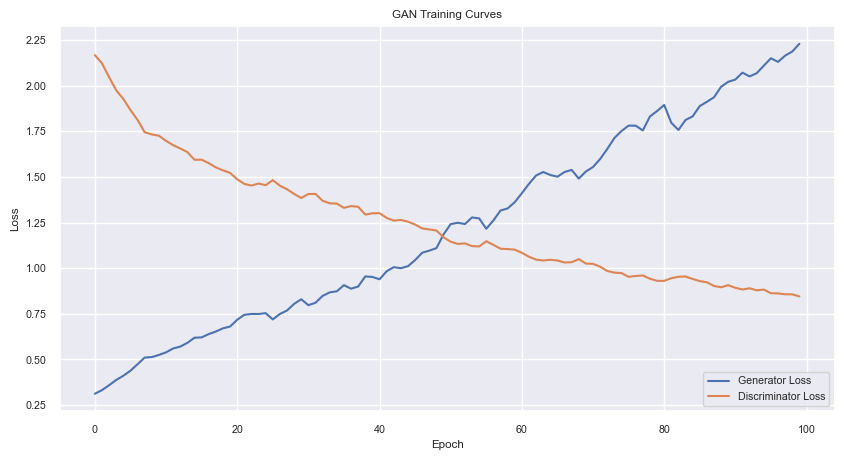


Training fold 2/5
开始训练GAN...
Epoch [10/100]
D_loss: 1.7200, G_loss: 0.4645
Epoch [20/100]
D_loss: 1.6109, G_loss: 0.5335
Epoch [30/100]
D_loss: 1.6409, G_loss: 0.5196
Epoch [40/100]
D_loss: 1.5348, G_loss: 0.5959
Epoch [50/100]
D_loss: 1.5082, G_loss: 0.6153
Epoch [60/100]
D_loss: 1.4776, G_loss: 0.6400
Epoch [70/100]
D_loss: 1.4469, G_loss: 0.6662
Epoch [80/100]
D_loss: 1.4159, G_loss: 0.7176
Epoch [90/100]
D_loss: 1.3558, G_loss: 0.7810
Epoch [100/100]
D_loss: 1.3226, G_loss: 0.8341


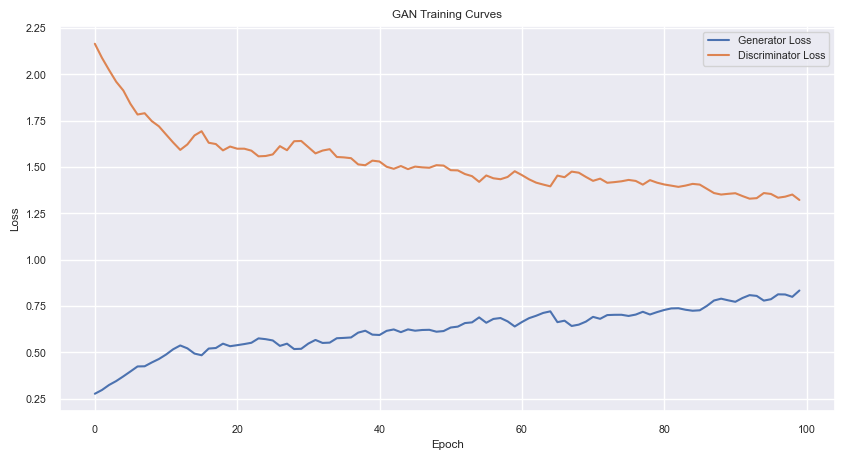


Training fold 3/5
开始训练GAN...
Epoch [10/100]
D_loss: 1.8502, G_loss: 0.3686
Epoch [20/100]
D_loss: 1.7022, G_loss: 0.4406
Epoch [30/100]
D_loss: 1.5152, G_loss: 0.5561
Epoch [40/100]
D_loss: 1.5687, G_loss: 0.5354
Epoch [50/100]
D_loss: 1.5207, G_loss: 0.5703
Epoch [60/100]
D_loss: 1.4119, G_loss: 0.6571
Epoch [70/100]
D_loss: 1.3531, G_loss: 0.7337
Epoch [80/100]
D_loss: 1.3300, G_loss: 0.7567
Epoch [90/100]
D_loss: 1.3073, G_loss: 0.8059
Epoch [100/100]
D_loss: 1.2691, G_loss: 0.8608


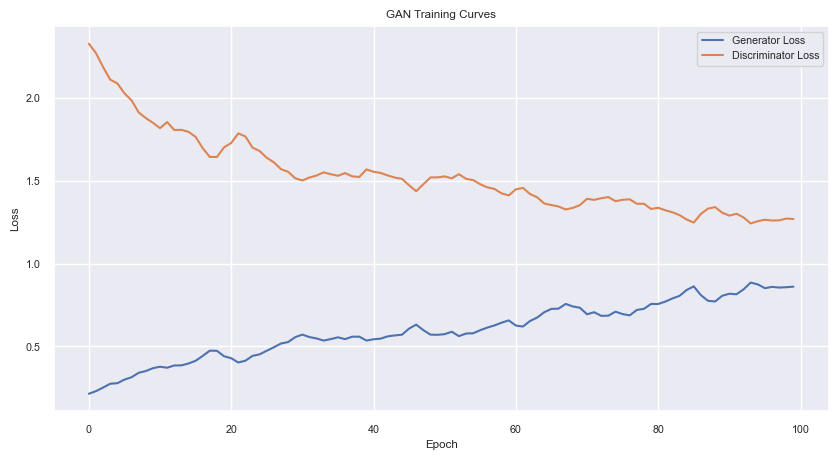


Training fold 4/5
开始训练GAN...
Epoch [10/100]
D_loss: 1.8353, G_loss: 0.3929
Epoch [20/100]
D_loss: 1.6893, G_loss: 0.4633
Epoch [30/100]
D_loss: 1.7227, G_loss: 0.4614
Epoch [40/100]
D_loss: 1.5454, G_loss: 0.5664
Epoch [50/100]
D_loss: 1.5131, G_loss: 0.5972
Epoch [60/100]
D_loss: 1.4483, G_loss: 0.6563
Epoch [70/100]
D_loss: 1.3861, G_loss: 0.7250
Epoch [80/100]
D_loss: 1.4001, G_loss: 0.7207
Epoch [90/100]
D_loss: 1.2998, G_loss: 0.8377
Epoch [100/100]
D_loss: 1.2464, G_loss: 0.9411


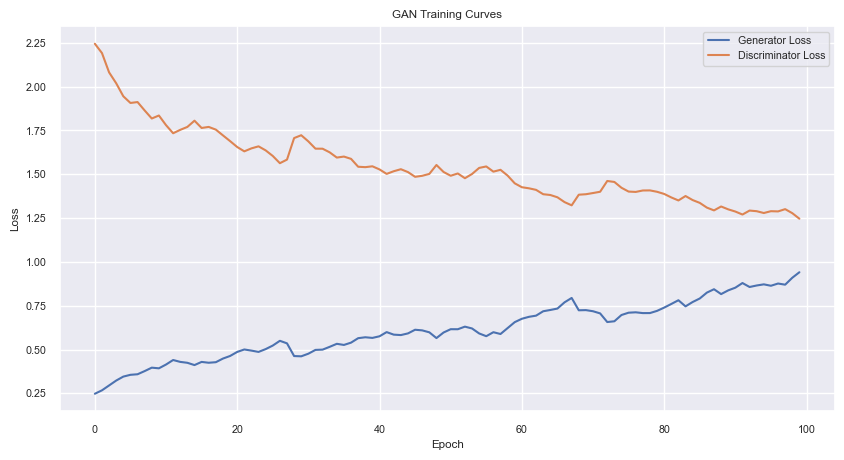


Training fold 5/5
开始训练GAN...
Epoch [10/100]
D_loss: 1.8374, G_loss: 0.3837
Epoch [20/100]
D_loss: 1.6079, G_loss: 0.5063
Epoch [30/100]
D_loss: 1.3953, G_loss: 0.6688
Epoch [40/100]
D_loss: 1.2674, G_loss: 0.8173
Epoch [50/100]
D_loss: 1.1940, G_loss: 0.9281
Epoch [60/100]
D_loss: 1.0646, G_loss: 1.1760
Epoch [70/100]
D_loss: 0.9645, G_loss: 1.4354
Epoch [80/100]
D_loss: 0.9147, G_loss: 1.6001
Epoch [90/100]
D_loss: 0.8525, G_loss: 1.8307
Epoch [100/100]
D_loss: 0.7943, G_loss: 2.1123


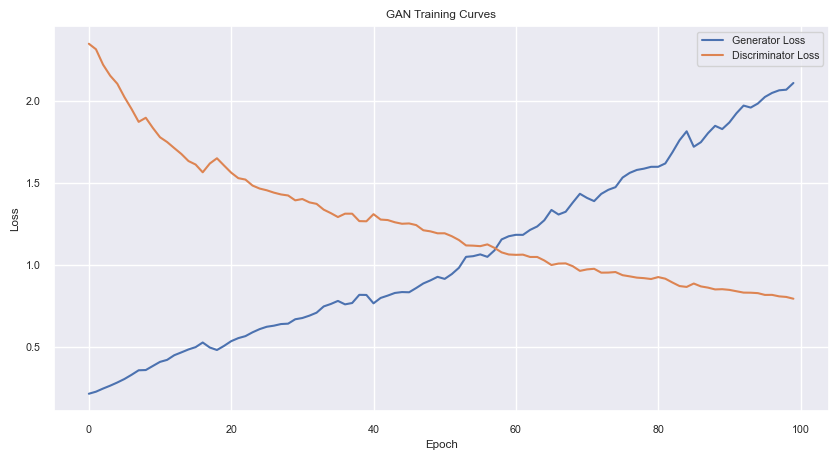


Best parameters:
{'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 20, 'learning_rate': 0.1, 'feature_fraction': 0.7, 'bagging_freq': 3, 'bagging_fraction': 0.9}
Mean CV AUC: 0.9835

Phase 2: Training final model...
开始训练GAN...
Epoch [10/100]
D_loss: 1.5616, G_loss: 0.5927
Epoch [20/100]
D_loss: 1.4928, G_loss: 0.6445
Epoch [30/100]
D_loss: 1.3823, G_loss: 0.7511
Epoch [40/100]
D_loss: 1.2423, G_loss: 0.9252
Epoch [50/100]
D_loss: 1.1403, G_loss: 1.1059
Epoch [60/100]
D_loss: 1.0375, G_loss: 1.3400
Epoch [70/100]
D_loss: 0.9386, G_loss: 1.6564
Epoch [80/100]
D_loss: 0.8778, G_loss: 1.8929
Epoch [90/100]
D_loss: 0.8166, G_loss: 2.1825
Epoch [100/100]
D_loss: 0.7729, G_loss: 2.3767


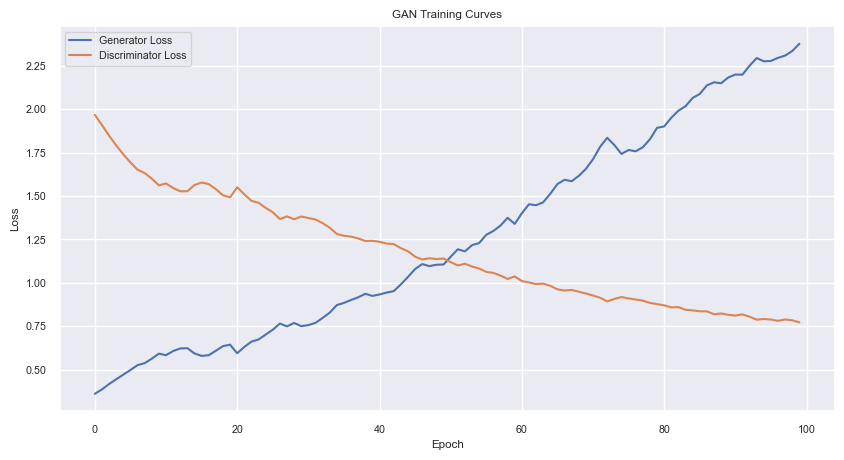


Test AUC: 0.6364


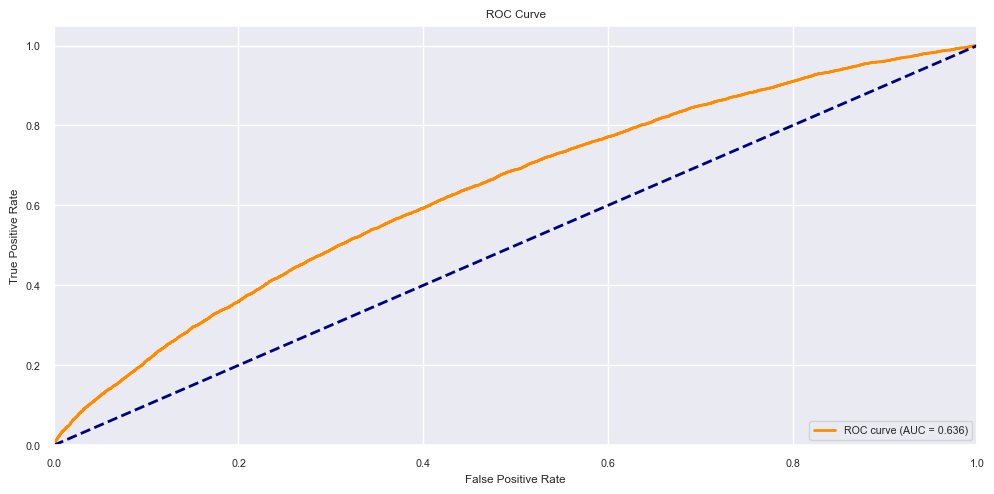

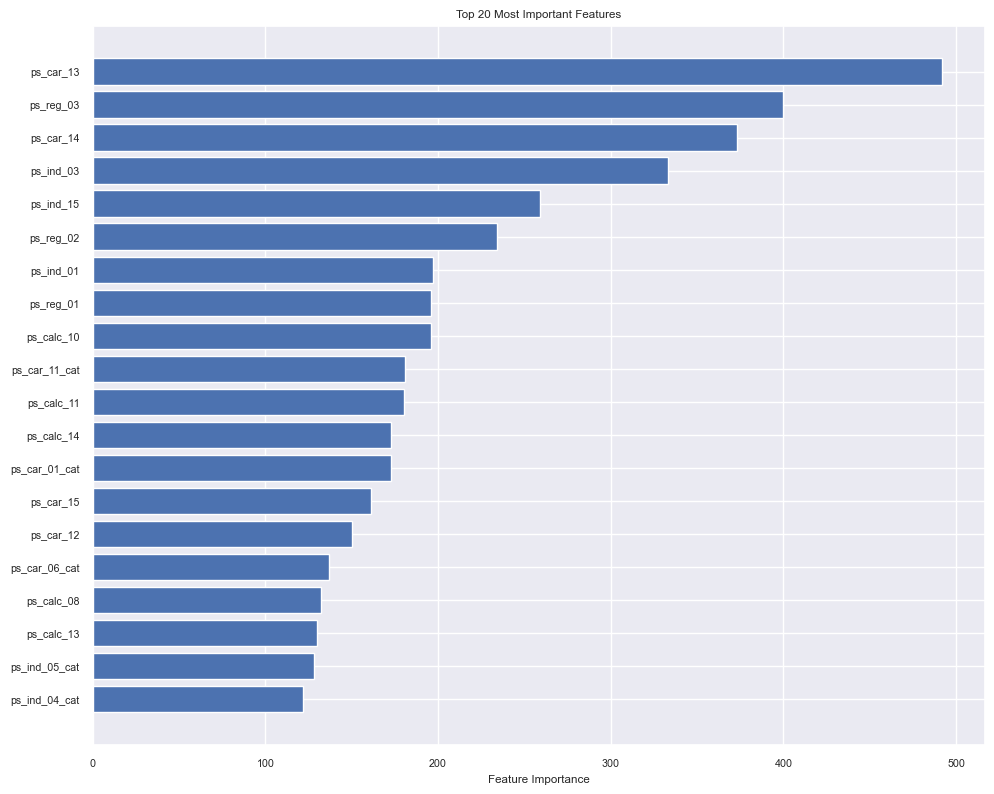


完成！结果已保存到results目录


In [81]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from lightgbm import LGBMClassifier
import lightgbm as lgb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class LightGBMTrainer:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        if not os.path.exists('results'):
            os.makedirs('results')

    def plot_performance_curves(self, y_true, y_pred):
        """绘制ROC曲线"""
        plt.figure(figsize=(10, 5))
        
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                 label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        
        plt.tight_layout()
        plt.savefig('results/roc_curve.png')
        plt.show()

    def plot_feature_importance(self, feature_importance, X_train):
        """绘制特征重要性"""
        importance_df = pd.DataFrame({
            'feature': X_train['feature'],  # 使用传入的特征名
            'importance': feature_importance
        }).sort_values('importance', ascending=True)
        
        plt.figure(figsize=(10, 8))
        n_features = min(20, len(importance_df))
        plt.barh(range(n_features), 
                importance_df.tail(n_features)['importance'],
                align='center')
        plt.yticks(range(n_features), 
                  importance_df.tail(n_features)['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top {n_features} Most Important Features')
        plt.tight_layout()
        plt.savefig('results/feature_importance.png')
        plt.show()

    def train(self, X_train, y_train, X_test, y_test):
        """训练模型"""
        # 保存原始特征名
        if isinstance(X_train, pd.DataFrame):
            feature_names = X_train.columns.tolist()
            X_train_values = X_train.values
        else:
            feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
            X_train_values = X_train
            
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if isinstance(y_test, pd.Series):
            y_test = y_test.values

        # 定义参数空间
        param_distributions = {
            'num_leaves': [31, 63, 127],
            'learning_rate': [0.01, 0.05, 0.1],
            'feature_fraction': [0.7, 0.8, 0.9],
            'bagging_fraction': [0.7, 0.8, 0.9],
            'bagging_freq': [3, 5, 7],
            'min_child_samples': [20, 50, 100],
            'n_estimators': [100, 200, 300]
        }
        
        # 记录每组参数的性能
        param_performances = {}
        best_params = None
        best_mean_auc = 0
        
        # 第一阶段：找到最佳参数
        print("Phase 1: Finding best parameters...")
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_values, y_train), 1):
            print(f"\nTraining fold {fold}/{self.n_splits}")
            
            X_train_fold = X_train_values[train_idx]
            y_train_fold = y_train[train_idx]
            X_val_fold = X_train_values[val_idx]
            y_val_fold = y_train[val_idx]
            
            # 使用GAN生成样本
            minority_mask = y_train_fold == 1
            X_minority = X_train_fold[minority_mask]
            gan = InsuranceGAN(input_dim=X_train_fold.shape[1])
            gan.train(X_minority, epochs=100, batch_size=32)
            n_synthetic = len(X_train_fold) - 2 * len(X_minority)
            synthetic_samples = gan.generate_samples(n_synthetic)
            
            # 合并训练数据
            X_train_balanced = np.vstack([X_train_fold, synthetic_samples])
            y_train_balanced = np.concatenate([y_train_fold, np.ones(n_synthetic)])
            
            # 基础模型
            base_model = LGBMClassifier(
                objective='binary',
                metric='auc',
                boosting_type='gbdt',
                verbose=-1
            )
            
            # 随机搜索
            random_search = RandomizedSearchCV(
                estimator=base_model,
                param_distributions=param_distributions,
                n_iter=20,
                scoring='roc_auc',
                cv=3,
                verbose=0,
                random_state=42,
                n_jobs=-1
            )
            
            random_search.fit(X_train_balanced, y_train_balanced)
            
            # 记录参数性能
            for params, mean_score in zip(random_search.cv_results_['params'],
                                        random_search.cv_results_['mean_test_score']):
                param_key = str(params)
                if param_key not in param_performances:
                    param_performances[param_key] = []
                param_performances[param_key].append(mean_score)
        
        # 计算平均性能找最佳参数
        for param_key, scores in param_performances.items():
            mean_score = np.mean(scores)
            if mean_score > best_mean_auc:
                best_mean_auc = mean_score
                best_params = eval(param_key)
        
        print("\nBest parameters:")
        print(best_params)
        print(f"Mean CV AUC: {best_mean_auc:.4f}")
        
        # 第二阶段：使用最佳参数训练最终模型
        print("\nPhase 2: Training final model...")
        
        # 对整个训练集使用GAN
        minority_mask = y_train == 1
        X_minority = X_train_values[minority_mask]
        gan = InsuranceGAN(input_dim=X_train_values.shape[1])
        gan.train(X_minority, epochs=100, batch_size=32)
        n_synthetic = len(X_train_values) - 2 * len(X_minority)
        synthetic_samples = gan.generate_samples(n_synthetic)
        
        # 合并数据
        X_train_balanced = np.vstack([X_train_values, synthetic_samples])
        y_train_balanced = np.concatenate([y_train, np.ones(n_synthetic)])
        
        # 训练最终模型
        final_model = LGBMClassifier(**best_params)
        final_model.fit(X_train_balanced, y_train_balanced)
        
        # 预测和评估
        test_pred = final_model.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, test_pred)
        print(f"\nTest AUC: {test_auc:.4f}")
        
        # 可视化
        self.plot_performance_curves(y_test, test_pred)
        feature_importance = final_model.feature_importances_
        
        # 创建临时DataFrame用于特征重要性可视化
        temp_df = pd.DataFrame({'feature': feature_names})
        self.plot_feature_importance(feature_importance, temp_df)
        
        return test_pred, feature_importance, final_model, best_params

def main():
    # 初始化训练器
    trainer = LightGBMTrainer()
    
    # 训练模型
    test_pred, feature_importance, final_model, best_params = trainer.train(
        X_train, y_train, X_test, y_test
    )
    
    # 保存结果
    submission = pd.DataFrame({
        'id': test_df['id'],
        'target': test_pred
    })
    submission.to_csv('results/submission.csv', index=False)
    print("\n完成！结果已保存到results目录")

if __name__ == "__main__":
    main()

Training model with cross validation...

Fold 1/5
Fold 1 AUC: 0.6267

Fold 2/5
Fold 2 AUC: 0.6352

Fold 3/5
Fold 3 AUC: 0.6352

Fold 4/5
Fold 4 AUC: 0.6386

Fold 5/5
Fold 5 AUC: 0.6381

Final Test AUC: 0.6419


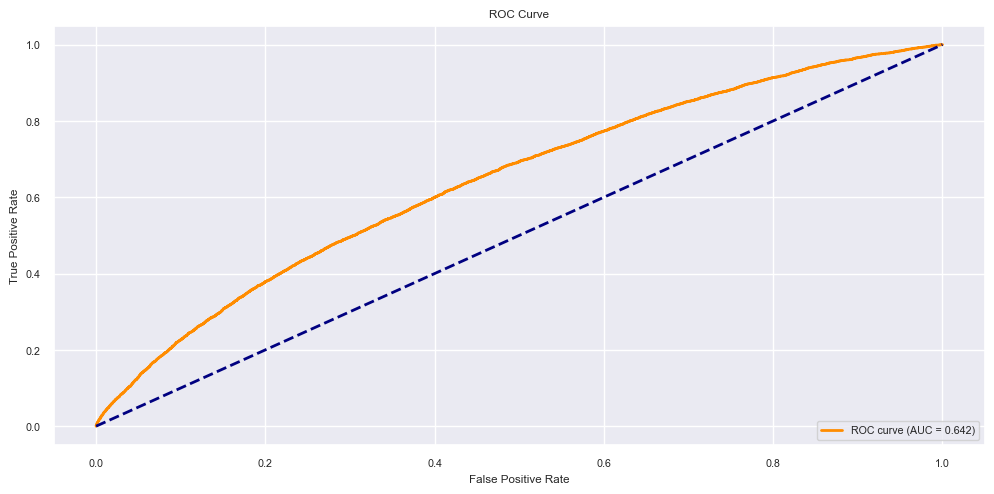

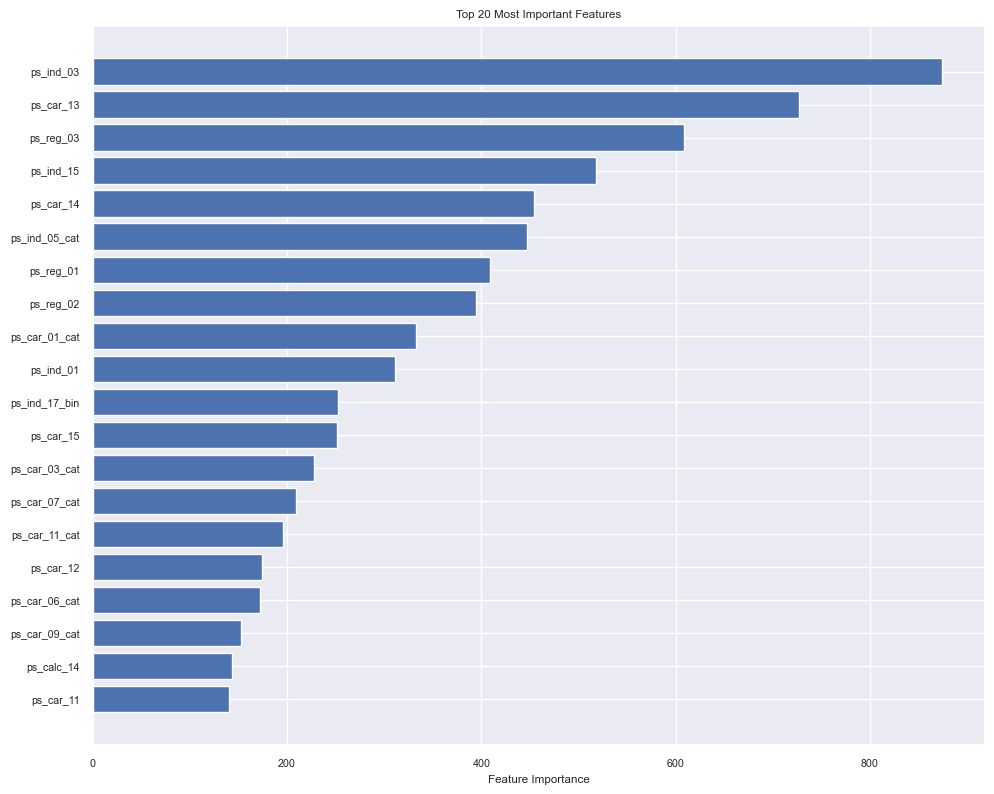


完成！结果已保存到results_base目录


In [80]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc
from lightgbm import LGBMClassifier
import lightgbm as lgb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class LightGBMTrainer:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        # 创建结果目录
        if not os.path.exists('results_base'):
            os.makedirs('results_base')
    
    def plot_performance_curves(self, y_true, y_pred):
        """绘制ROC曲线"""
        plt.figure(figsize=(10, 5))
        
        # ROC曲线
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                 label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        
        plt.tight_layout()
        plt.savefig('results_base/roc_curve.png')
        plt.show()

    def plot_feature_importance(self, feature_importance, X_train):
        """绘制特征重要性"""
        importance_df = pd.DataFrame({
            'feature': X_train['feature'],  # 使用传入的特征名
            'importance': feature_importance
        }).sort_values('importance', ascending=True)
        
        # 只显示 top 20
        plt.figure(figsize=(10, 8))
        n_features = min(20, len(importance_df))
        plt.barh(range(n_features), 
                importance_df.tail(n_features)['importance'],
                align='center')
        plt.yticks(range(n_features), 
                  importance_df.tail(n_features)['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top {n_features} Most Important Features')
        plt.tight_layout()
        plt.savefig('results_base/feature_importance.png')
        plt.show()
        
    def train(self, X_train, y_train, X_test, y_test):
        """训练模型"""
        # 保存原始特征名
        if isinstance(X_train, pd.DataFrame):
            feature_names = X_train.columns.tolist()
            X_train_values = X_train.values
        else:
            feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
            X_train_values = X_train
                
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if isinstance(y_test, pd.Series):
            y_test = y_test.values
            
        # 初始化结果数组
        feature_importance = np.zeros(X_train_values.shape[1])
        test_pred = np.zeros(len(X_test))
        
        # 定义参数空间
        param_distributions = {
            'num_leaves': [31, 63, 127],
            'learning_rate': [0.01, 0.05, 0.1],
            'feature_fraction': [0.7, 0.8, 0.9],
            'bagging_fraction': [0.7, 0.8, 0.9],
            'bagging_freq': [3, 5, 7],
            'min_child_samples': [20, 50, 100],
            'n_estimators': [100, 200, 300]
        }
        
        # 交叉验证
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        
        print("Training model with cross validation...")
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_values, y_train), 1):
            print(f"\nFold {fold}/{self.n_splits}")
            
            X_tr = X_train_values[train_idx]
            y_tr = y_train[train_idx]
            X_val = X_train_values[val_idx]
            y_val = y_train[val_idx]
            
            # 基础模型
            model = LGBMClassifier(
                objective='binary',
                metric='auc',
                boosting_type='gbdt',
                verbose=-1
            )
            
            # 随机搜索
            random_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_distributions,
                n_iter=20,
                scoring='roc_auc',
                cv=3,
                verbose=0,
                random_state=42,
                n_jobs=-1
            )
            
            random_search.fit(X_tr, y_tr)
            
            # 使用最佳参数训练模型
            best_model = LGBMClassifier(**random_search.best_params_)
            best_model.fit(X_tr, y_tr)
            
            # 预测并累加特征重要性
            fold_pred = best_model.predict_proba(X_test)[:, 1]
            test_pred += fold_pred / self.n_splits
            feature_importance += best_model.feature_importances_ / self.n_splits
            
            # 打印当前折的性能
            val_pred = best_model.predict_proba(X_val)[:, 1]
            fold_auc = roc_auc_score(y_val, val_pred)
            print(f'Fold {fold} AUC: {fold_auc:.4f}')
        
        # 评估最终预测结果
        final_auc = roc_auc_score(y_test, test_pred)
        print(f"\nFinal Test AUC: {final_auc:.4f}")
        
        # 可视化
        self.plot_performance_curves(y_test, test_pred)
        
        # 创建一个临时的 DataFrame 用于特征重要性可视化
        temp_df = pd.DataFrame({'feature': feature_names})
        self.plot_feature_importance(feature_importance, temp_df)
        
        return test_pred, feature_importance


def main():
    # 初始化训练器
    trainer = LightGBMTrainer()
    
    # 训练模型
    test_pred, feature_importance = trainer.train(X_train, y_train, X_test, y_test)
    
    # 保存结果
    submission = pd.DataFrame({
        'id': test_df['id'],
        'target': test_pred
    }) 
    submission.to_csv('results_base/submission.csv', index=False)
    print("\n完成！结果已保存到results_base目录")

if __name__ == "__main__":
    main()
